In [6]:
from nais.processor import nais_processor
nais_processor("/home/coliewo/Desktop/DATA/CNR/NAIS/cnr.yml")

Building database...
Processing 20240517 (CNR Bologna)
Processing 20240518 (CNR Bologna)
Processing 20240519 (CNR Bologna)
Processing 20240520 (CNR Bologna)
Processing 20240521 (CNR Bologna)
Processing 20240522 (CNR Bologna)
Processing 20240523 (CNR Bologna)
Processing 20240524 (CNR Bologna)
Processing 20240525 (CNR Bologna)
Processing 20240526 (CNR Bologna)
Processing 20240527 (CNR Bologna)
Processing 20240528 (CNR Bologna)
Processing 20240529 (CNR Bologna)
Processing 20240530 (CNR Bologna)
Processing 20240531 (CNR Bologna)
Processing 20240601 (CNR Bologna)
Processing 20240602 (CNR Bologna)
Processing 20240603 (CNR Bologna)
Processing 20240604 (CNR Bologna)
Processing 20240605 (CNR Bologna)
Processing 20240606 (CNR Bologna)
Processing 20240607 (CNR Bologna)
Processing 20240608 (CNR Bologna)
Processing 20240609 (CNR Bologna)
Processing 20240610 (CNR Bologna)
Processing 20240611 (CNR Bologna)
Processing 20240612 (CNR Bologna)
Processing 20240613 (CNR Bologna)
Processing 20240614 (CNR Bo

In [1]:
from nais.utils import combine_data
import pandas as pd
import xarray as xr

data_source = "/home/coliewo/Desktop/DATA/CNR/NAIS/processed"
date_range = pd.date_range("2024-05-17","2024-09-01")

ds = combine_data(data_source, date_range, "1h",
    flag_sensitivity=0.5)

ds.to_netcdf("cnr_may_aug.nc")

/home/coliewo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
from nais.checker import startNaisChecker
startNaisChecker("cnr_may_aug.nc", "cnr_may_aug_bad_data_bounds.nc")

Saved: cnr_may_aug_bad_data_bounds.nc


SystemExit: 0

/home/coliewo/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#### Start running from cell below, to include the removing of bad data.....

In [2]:
import xarray as xr
from nais.utils import remove_bad_data

ds = xr.open_dataset("cnr_may_aug.nc")
bad_data = xr.open_dataset("cnr_may_aug_bad_data_bounds.nc")
ds = remove_bad_data(ds, bad_data)

In [3]:
ds

<xarray.Dataset>
Dimensions:             (diameter: 55, time: 2569, flag: 86)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * time                (time) datetime64[ns] 2024-05-17 ... 2024-09-01
  * flag                (flag) <U61 '+ postfilter voltage may be too high' .....
Data variables:
    neg_ions            (time, diameter) float64 nan nan nan ... 395.4 527.2 nan
    pos_ions            (time, diameter) float64 nan nan nan ... 497.2 449.8 nan
    neg_particles       (time, diameter) float64 nan nan ... 5.219e+03 4.769e+03
    pos_particles       (time, diameter) float64 nan nan ... 5.185e+03 5.356e+03
    neg_ion_flags       (time, flag) int64 ...
    pos_ion_flags       (time, flag) int64 ...
    neg_particle_flags  (time, flag) int64 ...
    pos_particle_flags  (time, flag) int64 ...
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

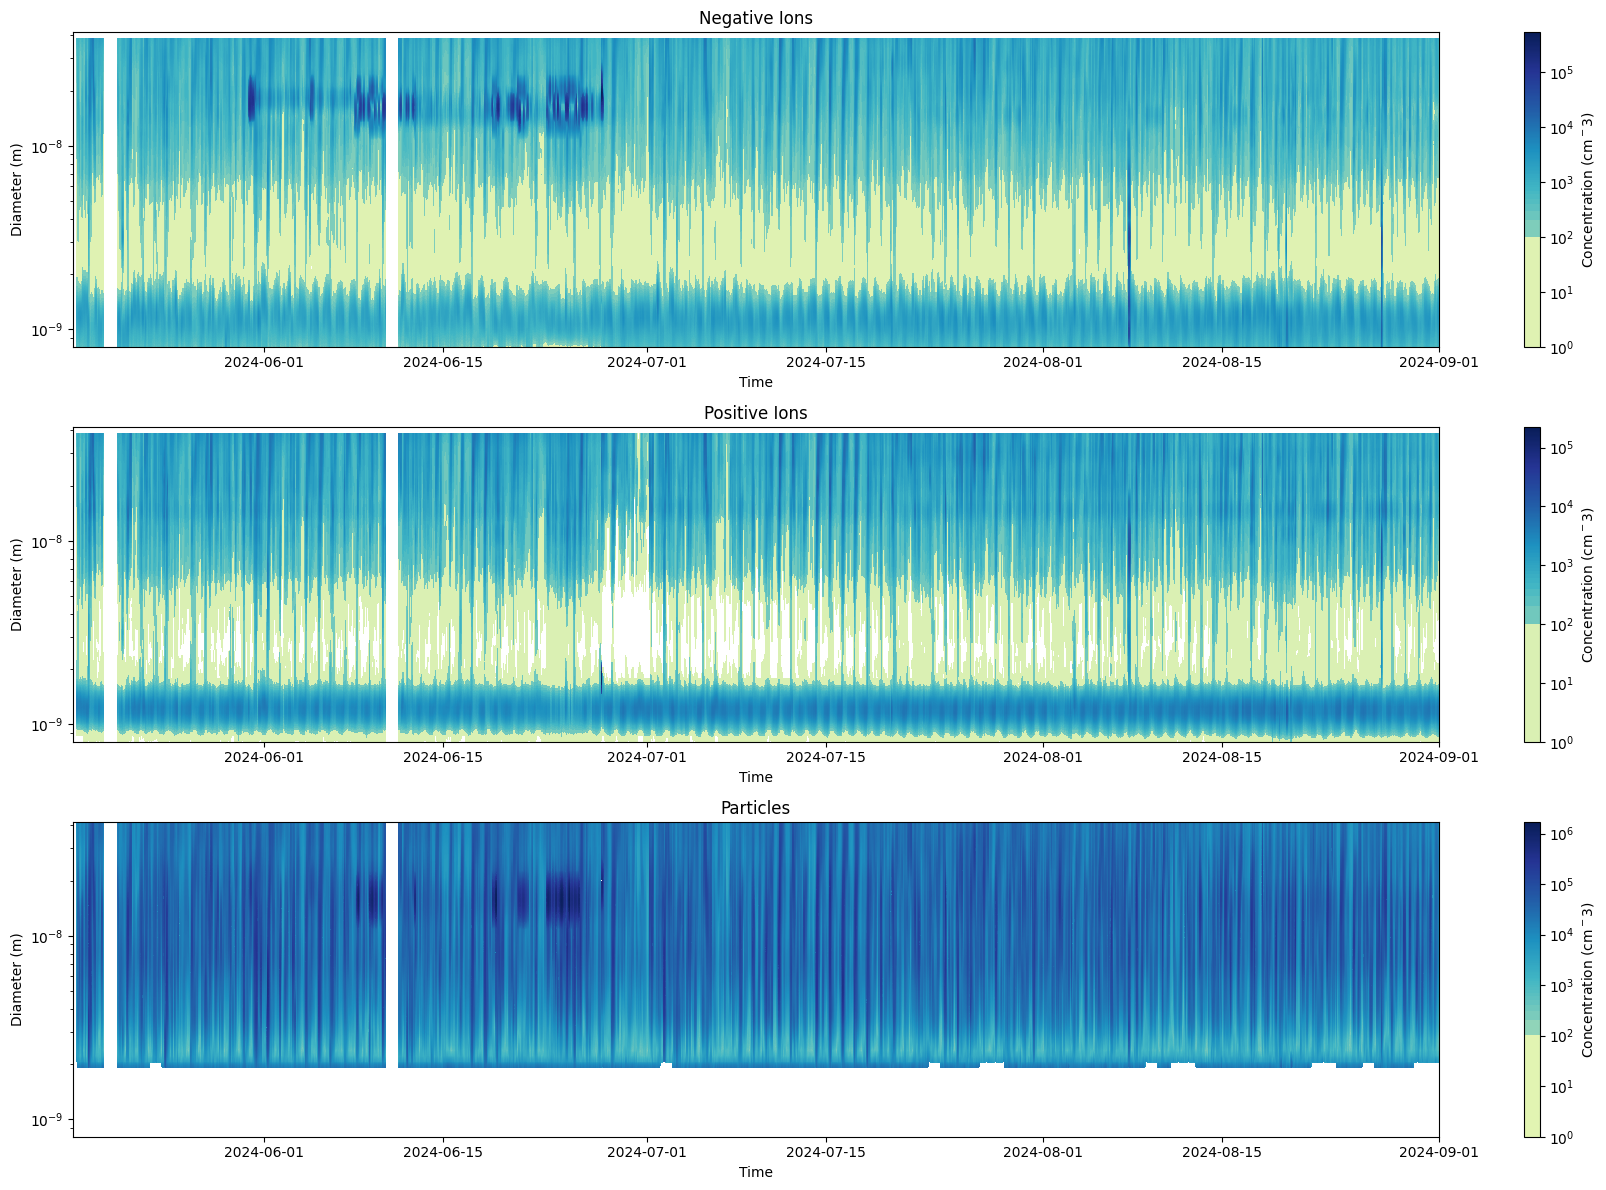

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from numpy import ma

# Extract the necessary variables
neg_ions = ds['neg_ions']
pos_ions = ds['pos_ions']

# Calculate particles (positive + negative particles)
particles = ds['pos_particles'] + ds['neg_particles']

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()

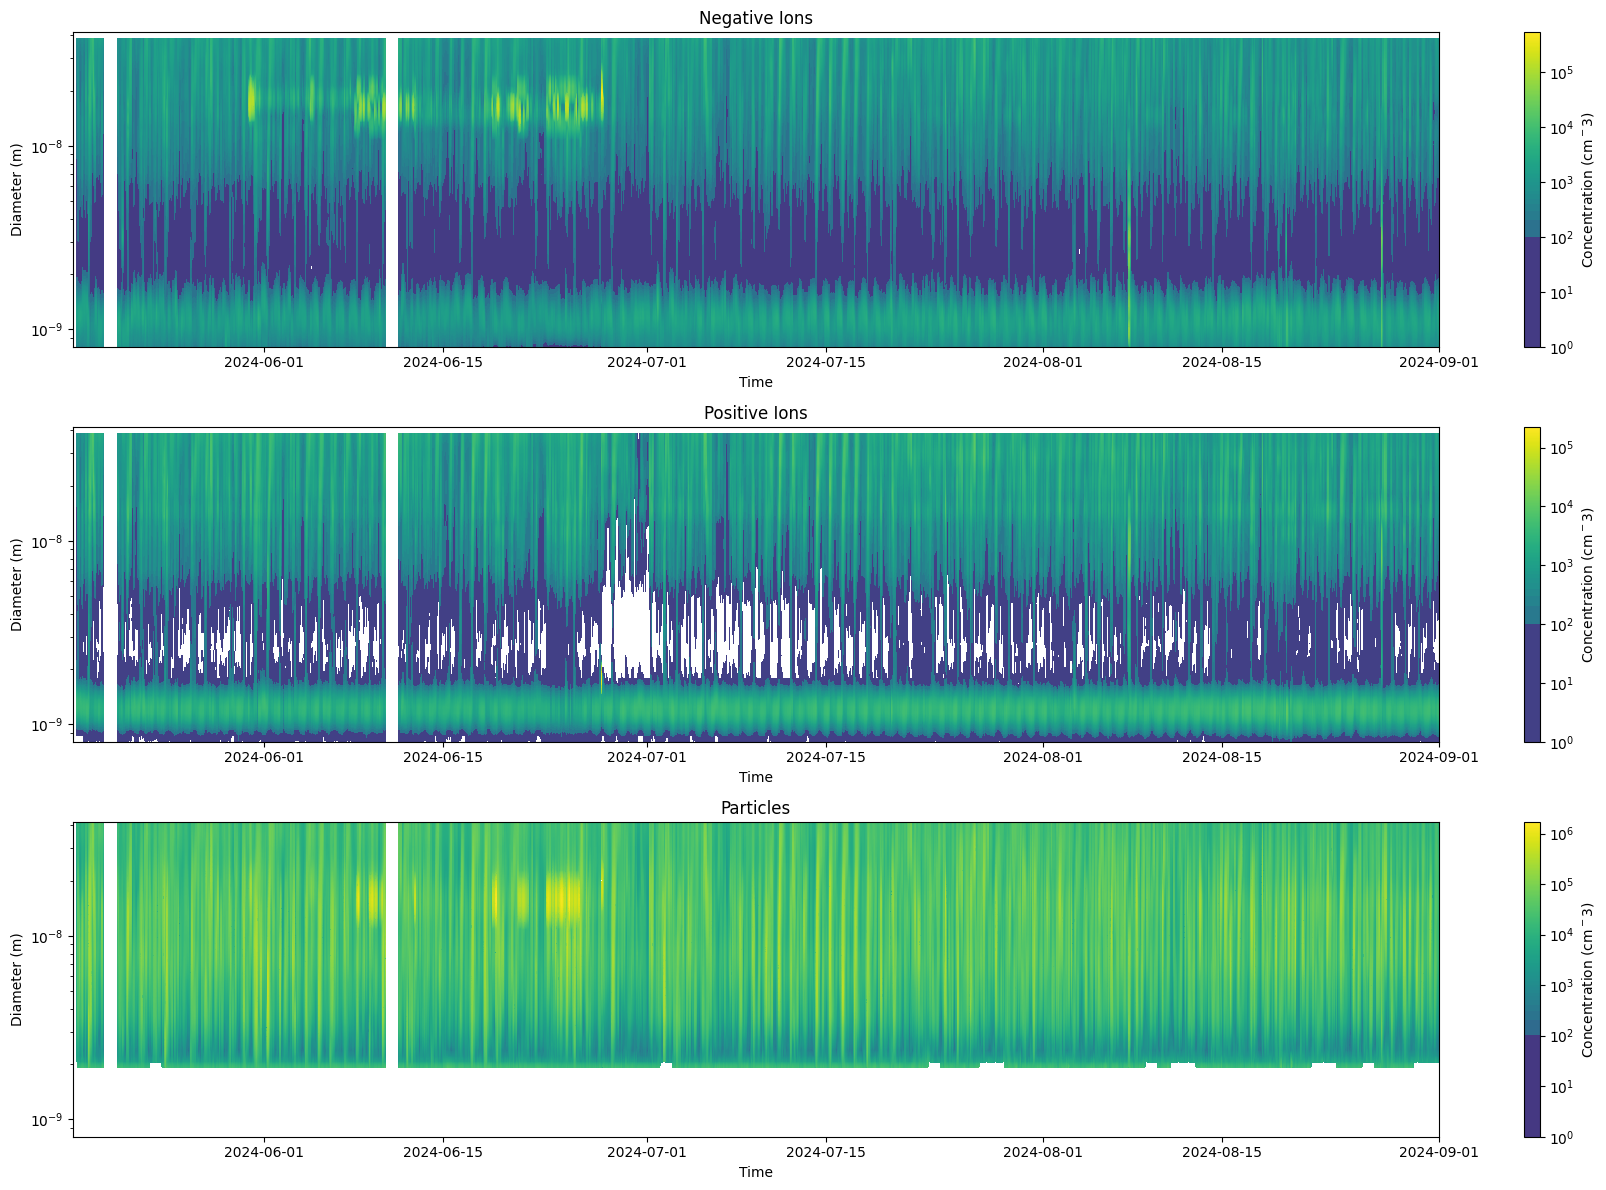

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from numpy import ma

# Extract the necessary variables
neg_ions = ds['neg_ions']
pos_ions = ds['pos_ions']

# Calculate particles (positive + negative particles)
particles = ds['pos_particles'] + ds['neg_particles']

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.viridis)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()

In [7]:
# Sum across the diameter dimension to get total concentrations
neg_ions_sum = ds['neg_ions'].sum(dim='diameter')
pos_ions_sum = ds['pos_ions'].sum(dim='diameter')
particles_sum = ds['neg_particles'].sum(dim='diameter') + ds['pos_particles'].sum(dim='diameter')

# Extract time coordinates
time = ds['time'].values

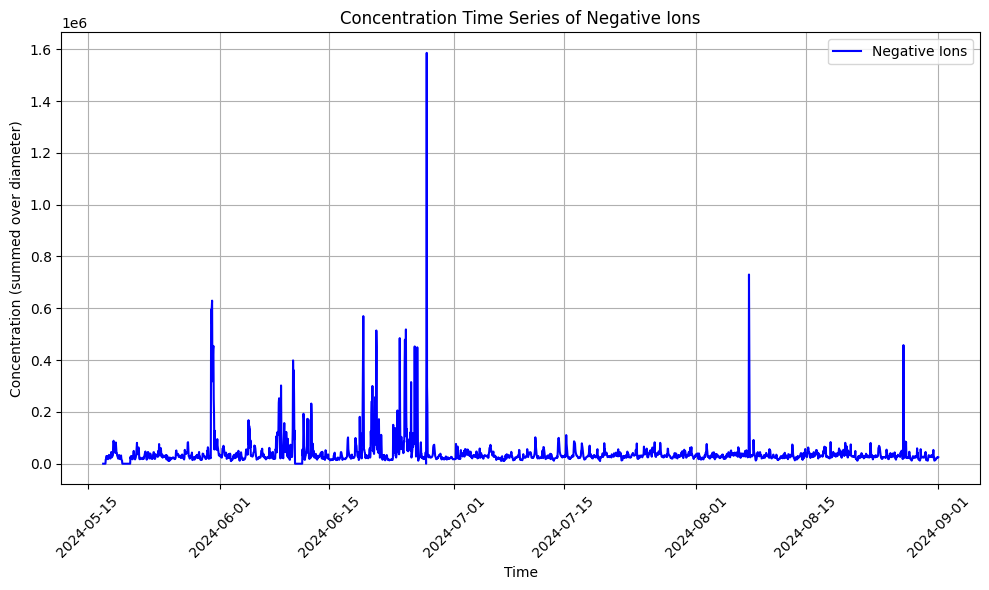

In [8]:

# Create separate plots for ions and particles

# Plot for Negative ions
plt.figure(figsize=(10, 6))
plt.plot(time, neg_ions_sum, label='Negative Ions', color='blue')

# Customize the plot for ions
plt.title('Concentration Time Series of Negative Ions')
plt.xlabel('Time')
plt.ylabel('Concentration (summed over diameter)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


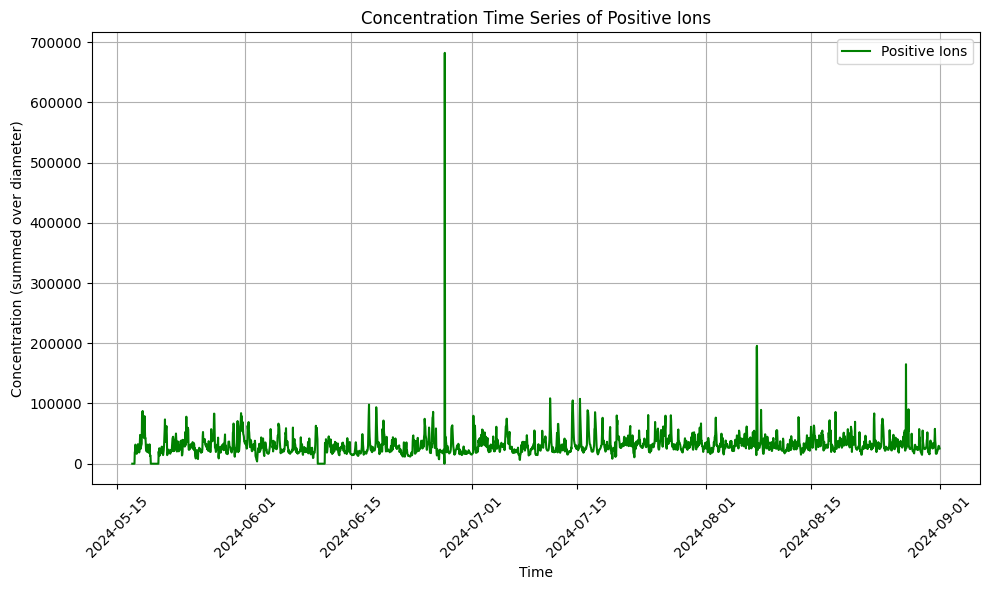

In [9]:

# Plot for Positive ions
plt.figure(figsize=(10, 6))
plt.plot(time, pos_ions_sum, label='Positive Ions', color='green')

# Customize the plot for ions
plt.title('Concentration Time Series of Positive Ions')
plt.xlabel('Time')
plt.ylabel('Concentration (summed over diameter)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


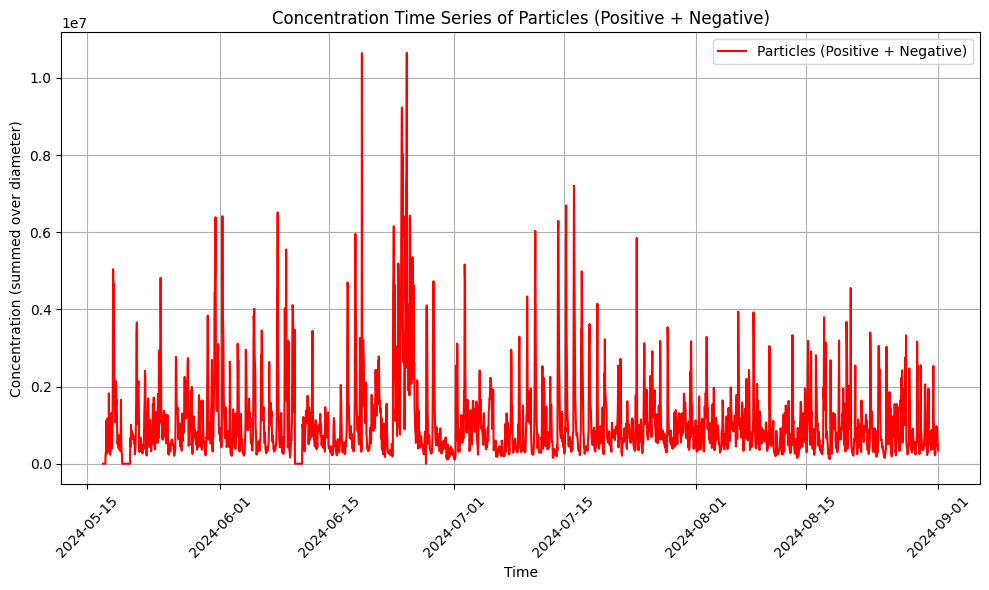

In [10]:

# Plot for particles
plt.figure(figsize=(10, 6))
plt.plot(time, particles_sum, label='Particles (Positive + Negative)', color='red')

# Customize the plot for particles
plt.title('Concentration Time Series of Particles (Positive + Negative)')
plt.xlabel('Time')
plt.ylabel('Concentration (summed over diameter)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


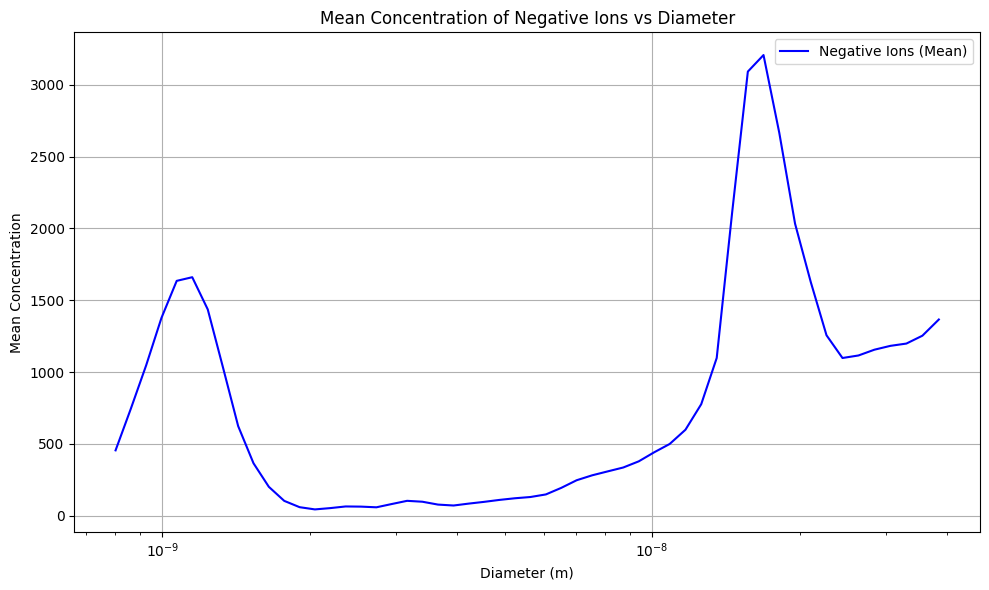

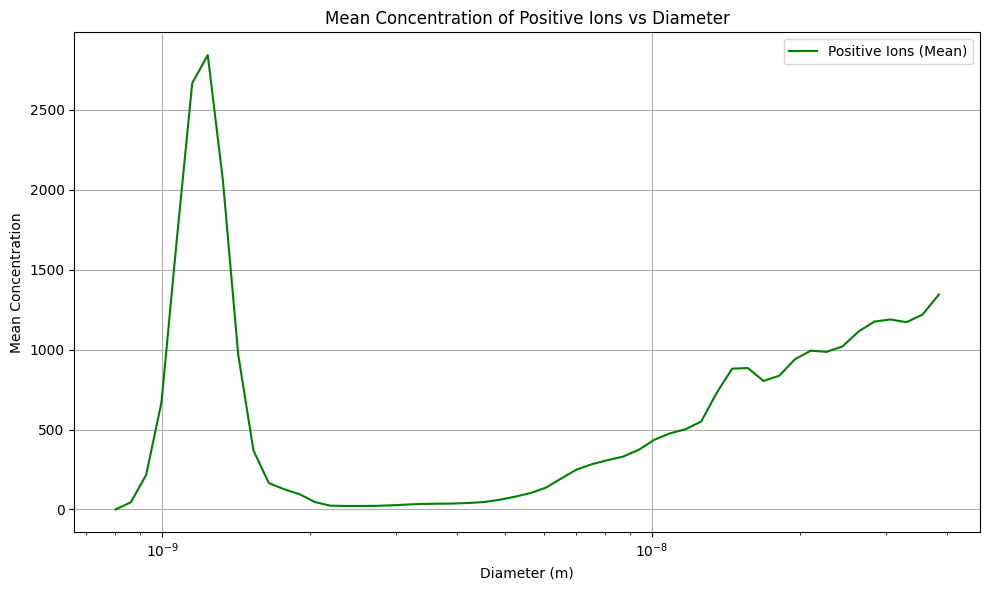

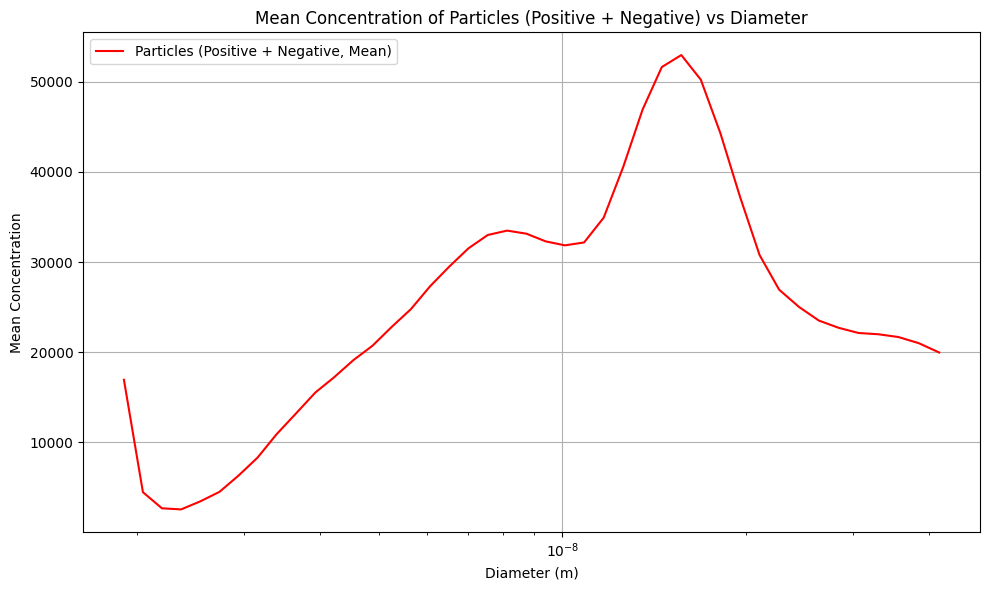

In [11]:
# Calculate the mean concentration over the time dimension instead of the sum
neg_ions_diameter_mean = ds['neg_ions'].mean(dim='time')
pos_ions_diameter_mean = ds['pos_ions'].mean(dim='time')
particles_diameter_mean = (ds['neg_particles'] + ds['pos_particles']).mean(dim='time')

# Extract the diameter values
diameter = ds['diameter'].values

# Create the plots using the mean over time

# Plot for negative ions (mean)
plt.figure(figsize=(10, 6))
plt.plot(diameter, neg_ions_diameter_mean, label='Negative Ions (Mean)', color='blue')
plt.title('Mean Concentration of Negative Ions vs Diameter')
plt.xlabel('Diameter (m)')
plt.ylabel('Mean Concentration')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Log scale for diameter to capture the wide range
plt.tight_layout()
plt.show()

# Plot for positive ions (mean)
plt.figure(figsize=(10, 6))
plt.plot(diameter, pos_ions_diameter_mean, label='Positive Ions (Mean)', color='green')
plt.title('Mean Concentration of Positive Ions vs Diameter')
plt.xlabel('Diameter (m)')
plt.ylabel('Mean Concentration')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.tight_layout()
plt.show()

# Plot for particles (positive + negative, mean)
plt.figure(figsize=(10, 6))
plt.plot(diameter, particles_diameter_mean, label='Particles (Positive + Negative, Mean)', color='red')
plt.title('Mean Concentration of Particles (Positive + Negative) vs Diameter')
plt.xlabel('Diameter (m)')
plt.ylabel('Mean Concentration')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.tight_layout()
plt.show()


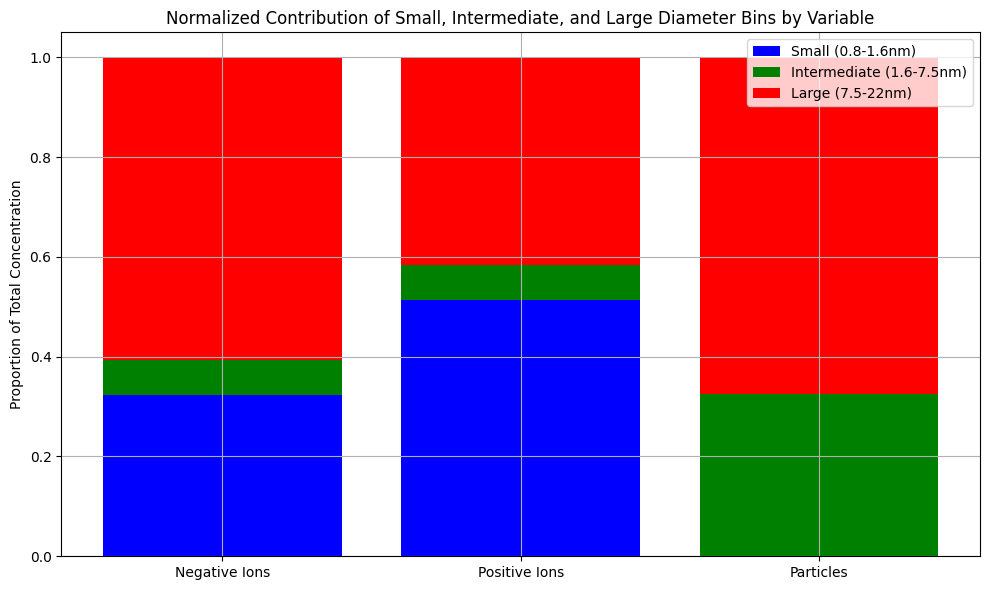

In [12]:
# Define diameter bins (in meters: 0.8nm = 0.8e-9, 1.6nm = 1.6e-9, etc.)
small_bin = (diameter >= 0.8e-9) & (diameter < 1.6e-9)
intermediate_bin = (diameter >= 1.6e-9) & (diameter < 7.5e-9)
large_bin = (diameter >= 7.5e-9) & (diameter <= 22e-9)

# Calculate mean concentration for each diameter bin (over time)
neg_ions_small = ds['neg_ions'].sel(diameter=small_bin).mean(dim='time').sum(dim='diameter')
neg_ions_intermediate = ds['neg_ions'].sel(diameter=intermediate_bin).mean(dim='time').sum(dim='diameter')
neg_ions_large = ds['neg_ions'].sel(diameter=large_bin).mean(dim='time').sum(dim='diameter')

pos_ions_small = ds['pos_ions'].sel(diameter=small_bin).mean(dim='time').sum(dim='diameter')
pos_ions_intermediate = ds['pos_ions'].sel(diameter=intermediate_bin).mean(dim='time').sum(dim='diameter')
pos_ions_large = ds['pos_ions'].sel(diameter=large_bin).mean(dim='time').sum(dim='diameter')

particles_small = (ds['neg_particles'] + ds['pos_particles']).sel(diameter=small_bin).mean(dim='time').sum(dim='diameter')
particles_intermediate = (ds['neg_particles'] + ds['pos_particles']).sel(diameter=intermediate_bin).mean(dim='time').sum(dim='diameter')
particles_large = (ds['neg_particles'] + ds['pos_particles']).sel(diameter=large_bin).mean(dim='time').sum(dim='diameter')

# Adjusting the plot to have variables (Negative Ions, Positive Ions, and Particles) on the x-axis
# with stacks showing contributions from small, intermediate, and large size bins

# Prepare the data for the new plot structure
variables = ['Negative Ions', 'Positive Ions', 'Particles']

# Normalize the contributions so that they sum to 1 for each variable
total_neg_ions = neg_ions_small + neg_ions_intermediate + neg_ions_large
total_pos_ions = pos_ions_small + pos_ions_intermediate + pos_ions_large
total_particles = particles_small + particles_intermediate + particles_large

# Calculate normalized contributions
small_contributions_norm = [neg_ions_small / total_neg_ions, pos_ions_small / total_pos_ions, particles_small / total_particles]
intermediate_contributions_norm = [neg_ions_intermediate / total_neg_ions, pos_ions_intermediate / total_pos_ions, particles_intermediate / total_particles]
large_contributions_norm = [neg_ions_large / total_neg_ions, pos_ions_large / total_pos_ions, particles_large / total_particles]

# Create a normalized stacked plot with variables on the x-axis and size contributions stacked
plt.figure(figsize=(10, 6))

# Plot for small size contributions (normalized)
plt.bar(variables, small_contributions_norm, label='Small (0.8-1.6nm)', color='blue')

# Plot for intermediate size contributions (normalized)
plt.bar(variables, intermediate_contributions_norm, label='Intermediate (1.6-7.5nm)', color='green', bottom=small_contributions_norm)

# Plot for large size contributions (normalized)
plt.bar(variables, large_contributions_norm, label='Large (7.5-22nm)', color='red', 
        bottom=[i+j for i,j in zip(small_contributions_norm, intermediate_contributions_norm)])

# Customize the plot
plt.title('Normalized Contribution of Small, Intermediate, and Large Diameter Bins by Variable')
plt.ylabel('Proportion of Total Concentration')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### Nanoparticle Ranking Analysis
https://ar.copernicus.org/articles/1/81/2023/

#### How about we use the negatively charged particles for this part ie negative ions

In [9]:
print(ds['diameter'].values)


[8.02879995e-10 8.62828998e-10 9.27254239e-10 9.96153364e-10
 1.07017200e-09 1.15119523e-09 1.23835276e-09 1.33004880e-09
 1.42853463e-09 1.53530865e-09 1.65006335e-09 1.77383533e-09
 1.90689151e-09 2.04892193e-09 2.20153115e-09 2.36722904e-09
 2.54539816e-09 2.73599893e-09 2.94087199e-09 3.16011296e-09
 3.39569827e-09 3.65377117e-09 3.93145759e-09 4.22385724e-09
 4.53800393e-09 4.87892846e-09 5.24546548e-09 5.64126564e-09
 6.06693116e-09 6.52192045e-09 7.01103164e-09 7.54292682e-09
 8.11517448e-09 8.72847179e-09 9.38811851e-09 1.00955239e-08
 1.08562331e-08 1.16916292e-08 1.25913098e-08 1.35414036e-08
 1.45631880e-08 1.56757975e-08 1.68734090e-08 1.81717471e-08
 1.95699870e-08 2.10714554e-08 2.26881210e-08 2.44557438e-08
 2.63610813e-08 2.84161425e-08 3.06314124e-08 3.30248335e-08
 3.56052673e-08 3.84642036e-08 4.15526991e-08]


In [13]:
# Step 1: Extract data for the diameter range required 2.5-5nm
ds_sub = ds['neg_ions'].sel(diameter=slice(2.5e-9, 5e-9)) 

In [14]:
ds_sub

<xarray.DataArray 'neg_ions' (time: 2569, diameter: 10)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [ 7.420301,  7.877049, 10.177987, ..., 50.92607 , 59.279192, 64.375778],
       [11.611219, 13.537815, 17.380368, ..., 37.741194, 41.137285, 47.629162],
       [ 3.005888,  3.313709,  5.998347, ..., 34.304453, 36.923778, 45.789712]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-09-01
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

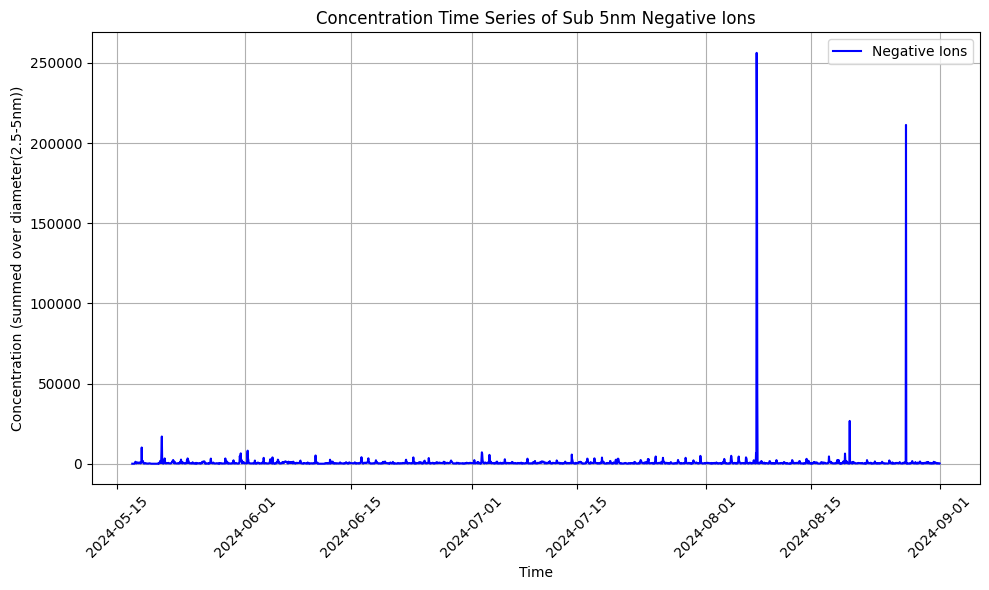

In [17]:
# Plot for Negative ions sub-5nm
import matplotlib.pyplot as plt
# Sum across the diameter dimension to get total concentrations
sub_neg_ions_sum = ds_sub.sum(dim='diameter')
# Extract time coordinates
time = ds_sub['time'].values

plt.figure(figsize=(10, 6))
plt.plot(time, sub_neg_ions_sum, label='Negative Ions', color='blue')

# Customize the plot for ions
plt.title('Concentration Time Series of Sub 5nm Negative Ions')
plt.xlabel('Time')
plt.ylabel('Concentration (summed over diameter(2.5-5nm))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Step 2: Smooth out the time series, apply rolling median over 2hr intervals

ds_sub_rolling_med = ds_sub.rolling(time=2, center=True).median()

# Drop NaN values resulting from the rolling operation
rolling_median_sub = ds_sub_rolling_med.dropna(dim='time')
rolling_median_sub

<xarray.DataArray 'neg_ions' (time: 2508, diameter: 10)>
array([[ 77.25186787,  75.47784678,  67.47565434, ...,  57.93595155,
         56.62138373,  60.13541447],
       [ 89.55485073,  94.93575779,  94.42401243, ..., 106.52568718,
        107.1379618 , 117.6606241 ],
       [ 58.13097298,  63.32063168,  67.61414228, ..., 105.55601359,
        113.52895331, 135.0452141 ],
       ...,
       [  4.9847678 ,   4.72414965,   5.09024384, ...,  33.11077011,
         40.98753641,  49.56878399],
       [  9.51576   ,  10.70743192,  13.77917757, ...,  44.33363187,
         50.20823825,  56.00246969],
       [  7.30855303,   8.42576205,  11.68935742, ...,  36.02282334,
         39.03053153,  46.70943696]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * time      (time) datetime64[ns] 2024-05-17T09:00:00 ... 2024-09-01
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

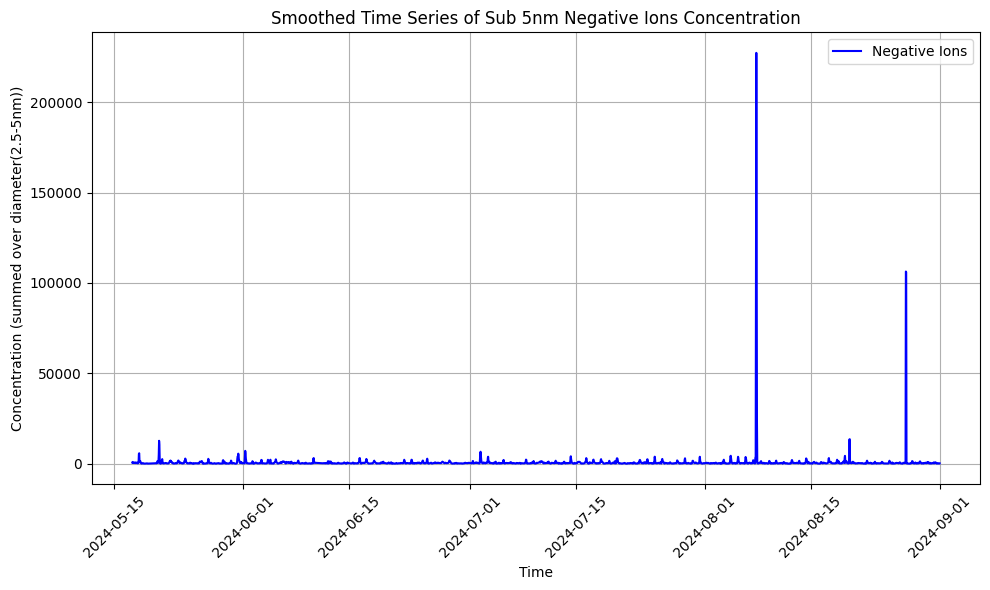

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(rolling_median_sub['time'].values, rolling_median_sub.sum(dim='diameter'), label='Negative Ions', color='blue')

# Customize the plot for ions
plt.title('Smoothed Time Series of Sub 5nm Negative Ions Concentration')
plt.xlabel('Time')
plt.ylabel('Concentration (summed over diameter(2.5-5nm))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# subdivide the data to the months
may = rolling_median_sub.sel(time=slice('2024-05', '2024-05'))
june = rolling_median_sub.sel(time=slice('2024-06', '2024-06'))
july = rolling_median_sub.sel(time=slice('2024-07', '2024-07'))
aug = rolling_median_sub.sel(time=slice('2024-08', '2024-08'))

In [47]:
# Step 3: Now, calculate diurnal variations, e.g., the mean across each hour for each month
may_diurnal_variation = may.groupby(may.time.dt.hour).mean(dim='time')
june_diurnal_variation = june.groupby(june.time.dt.hour).mean(dim='time')
july_diurnal_variation = july.groupby(july.time.dt.hour).mean(dim='time')
aug_diurnal_variation = aug.groupby(aug.time.dt.hour).mean(dim='time')


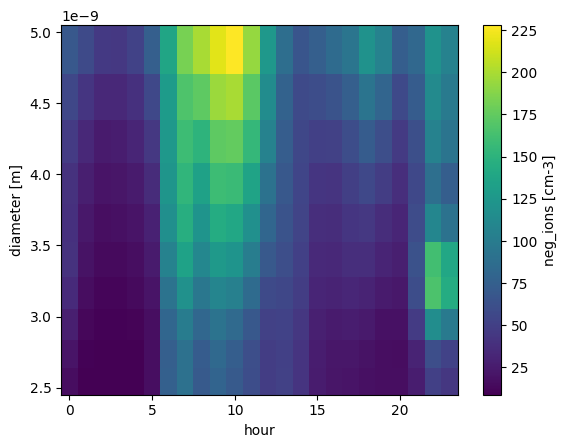

In [50]:
may_diurnal_variation.T.plot()

In [51]:
may_diurnal_variation

<xarray.DataArray 'neg_ions' (hour: 24, diameter: 10)>
array([[ 16.12924861,  20.11381402,  27.15729444,  35.1813837 ,
         39.86388592,  38.86136127,  39.85480787,  46.81169032,
         55.64120028,  68.00782228],
       [  9.58550423,  10.51374402,  12.40436551,  15.9712495 ,
         19.73844741,  23.21689007,  27.49666076,  33.28515339,
         42.76271805,  58.18231473],
       [  8.82656538,   9.47361015,   9.91801515,  11.59380723,
         14.10055978,  16.95420311,  20.2075824 ,  25.01448653,
         33.06091154,  45.12377261],
       [  8.94794789,   9.13597173,  10.24927967,  12.0157067 ,
         14.60589044,  17.46869507,  20.96339591,  25.99478976,
         33.49538905,  44.55144013],
       [  9.52389719,   9.65264905,  11.17551198,  14.08158598,
         17.21274514,  20.31918792,  24.54024955,  31.38064224,
         39.57809337,  52.37854183],
       [ 16.85406733,  16.76476446,  17.29656086,  20.54564325,
         24.85738185,  29.31256044,  35.8611542 ,  44.74341875,
         56.34506627,  74.20770948],
       [ 74.92349819,  74.18404085,  80.43748297,  92.57009145,
        105.42456514, 117.25075854, 123.38486366, 125.85679171,
...
         37.69267749,  42.31724341,  49.44885197,  60.18286175,
         74.41690593,  93.92373535],
       [ 17.82321861,  19.87160304,  23.57637297,  30.07322429,
         37.19011543,  44.51033387,  56.5359881 ,  72.08786802,
         92.88931724, 120.35392989],
       [ 17.04527483,  16.75182906,  19.05937598,  24.39066333,
         30.52527246,  36.91276071,  47.37720617,  60.77107891,
         79.26236523, 105.43215632],
       [ 16.84699678,  16.27604139,  18.69360998,  22.82737002,
         27.217982  ,  31.56374141,  37.74663987,  45.86076239,
         57.23751508,  73.29765512],
       [ 26.41031633,  30.19320397,  46.96110711,  59.49838012,
         63.77134885,  58.92202498,  56.23930262,  61.62394786,
         71.73977545,  82.29016237],
       [ 50.23468118,  60.22502028, 115.78939388, 166.17234727,
        161.37275312, 109.75790352,  87.85240494, 106.11869848,
        112.85013086, 119.77372489],
       [ 43.1979573 ,  52.46169766,  98.10411588, 143.7675427 ,
        139.14189642,  91.80951125,  73.53463152,  93.49001394,
         98.32234678, 104.84504347]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * hour      (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

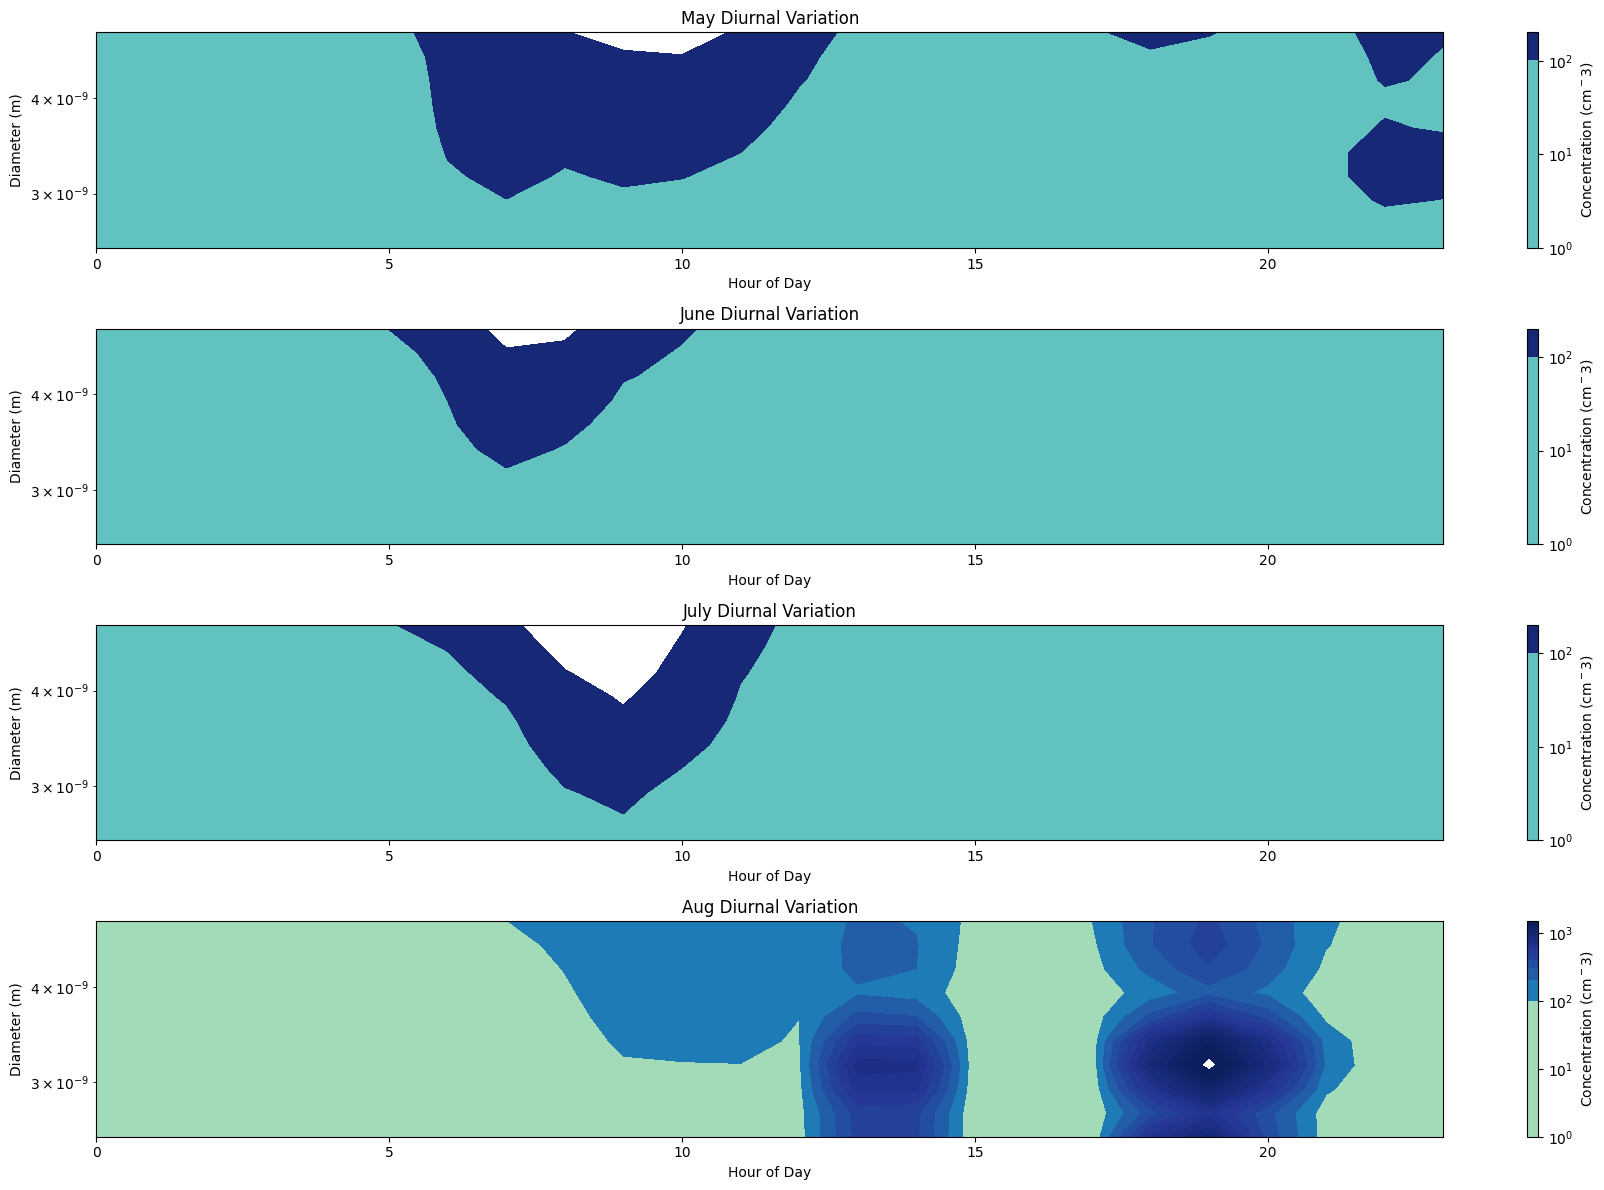

In [55]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    #masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['hour'], var['diameter'], var.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(4, 1, figsize=(18, 12))

plot_spectral_data(may_diurnal_variation, 'May Diurnal Variation', axs[0])
plot_spectral_data(june_diurnal_variation, 'June Diurnal Variation', axs[1])
plot_spectral_data(july_diurnal_variation, 'July Diurnal Variation', axs[2])
plot_spectral_data(aug_diurnal_variation, 'Aug Diurnal Variation', axs[3])

plt.tight_layout()
plt.show()

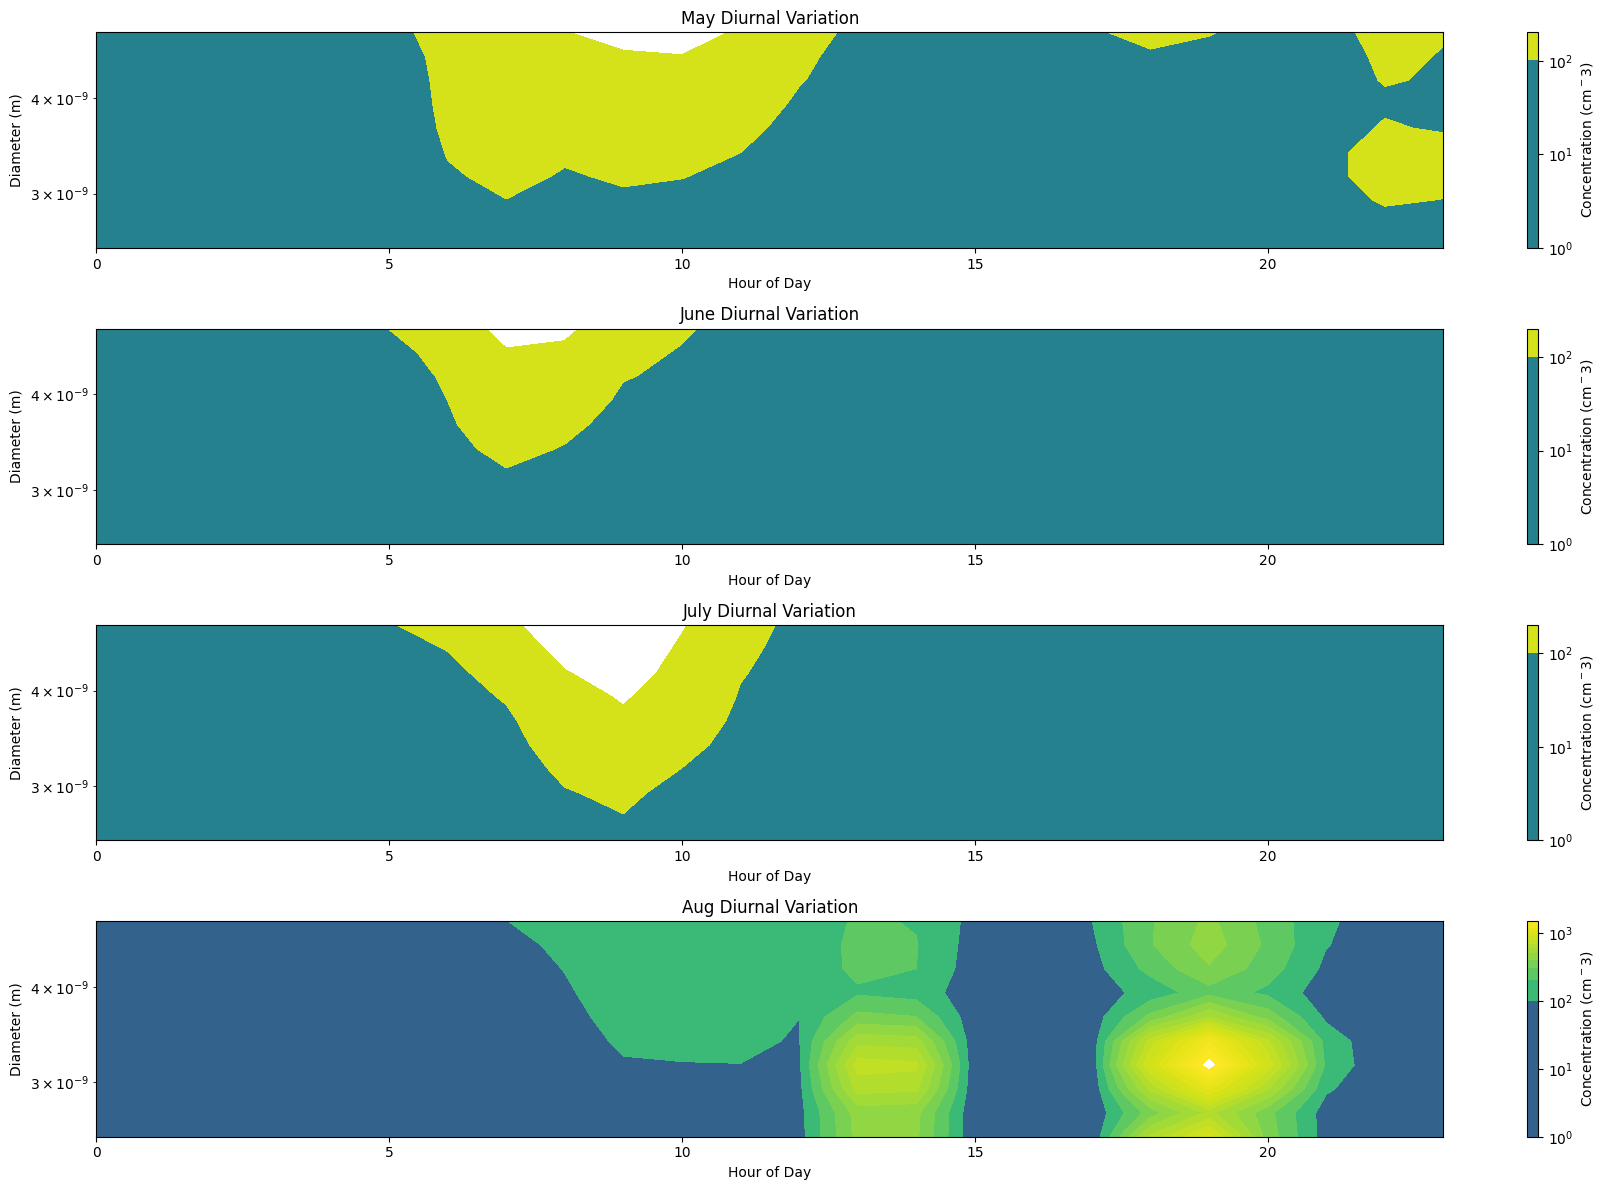

In [137]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    #masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['hour'], var['diameter'], var.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.viridis)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(4, 1, figsize=(18, 12))

plot_spectral_data(may_diurnal_variation, 'May Diurnal Variation', axs[0])
plot_spectral_data(june_diurnal_variation, 'June Diurnal Variation', axs[1])
plot_spectral_data(july_diurnal_variation, 'July Diurnal Variation', axs[2])
plot_spectral_data(aug_diurnal_variation, 'Aug Diurnal Variation', axs[3])

plt.tight_layout()
plt.show()

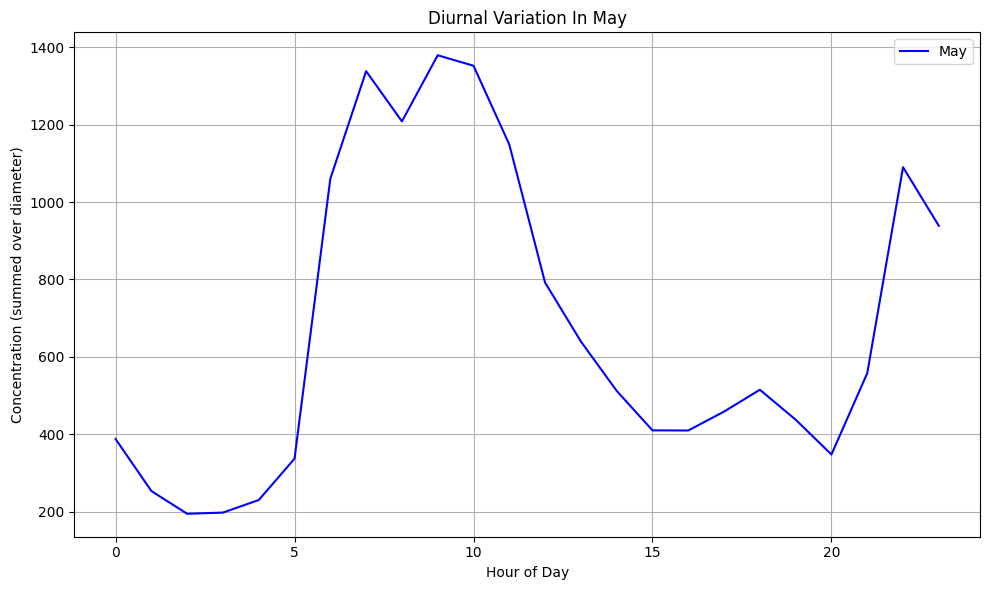

In [64]:
# Take the mean over diameter to have a line plot

plt.figure(figsize=(10, 6))
plt.plot(may_diurnal_variation['hour'], may_diurnal_variation.sum(dim='diameter'), label='May', color='blue')

# Customize the plot for ions
plt.title('Diurnal Variation In May')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (summed over diameter)')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

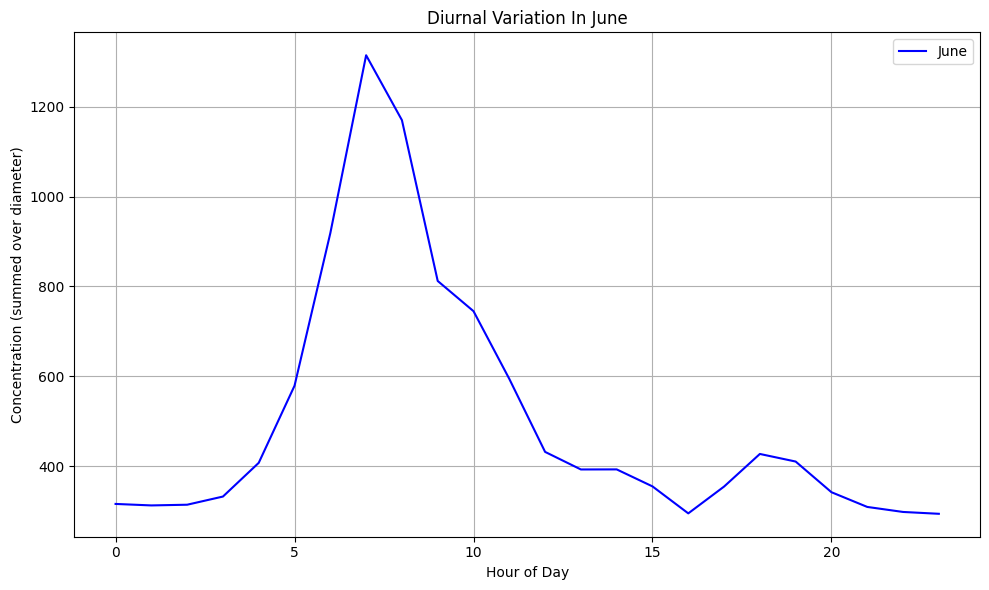

In [65]:
# Take the mean over diameter to have a line plot

plt.figure(figsize=(10, 6))
plt.plot(june_diurnal_variation['hour'], june_diurnal_variation.sum(dim='diameter'), label='June', color='blue')

# Customize the plot for ions
plt.title('Diurnal Variation In June')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (summed over diameter)')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

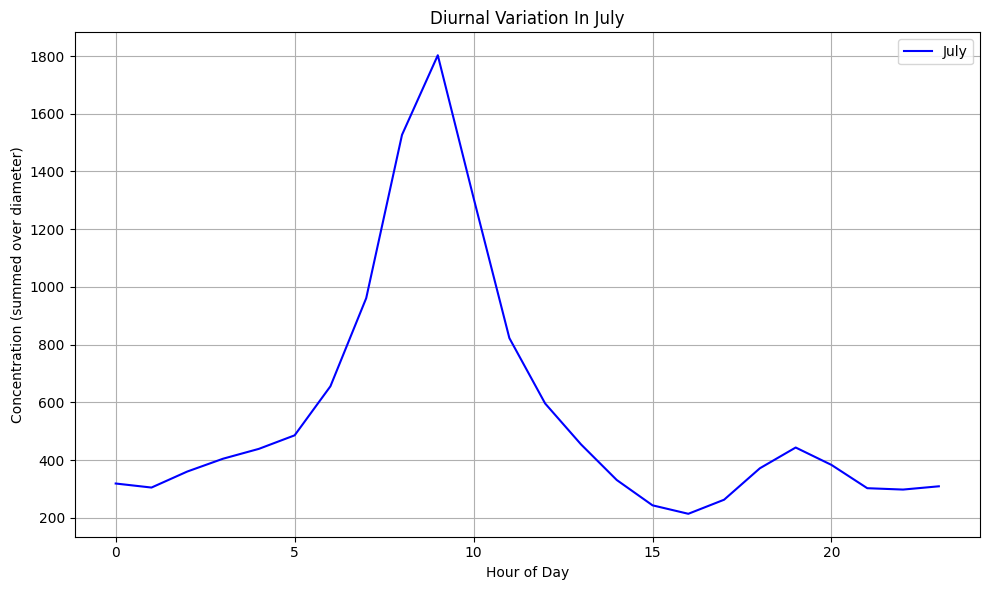

In [66]:
# Take the mean over diameter to have a line plot

plt.figure(figsize=(10, 6))
plt.plot(july_diurnal_variation['hour'], july_diurnal_variation.sum(dim='diameter'), label='July', color='blue')

# Customize the plot for ions
plt.title('Diurnal Variation In July')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (summed over diameter)')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

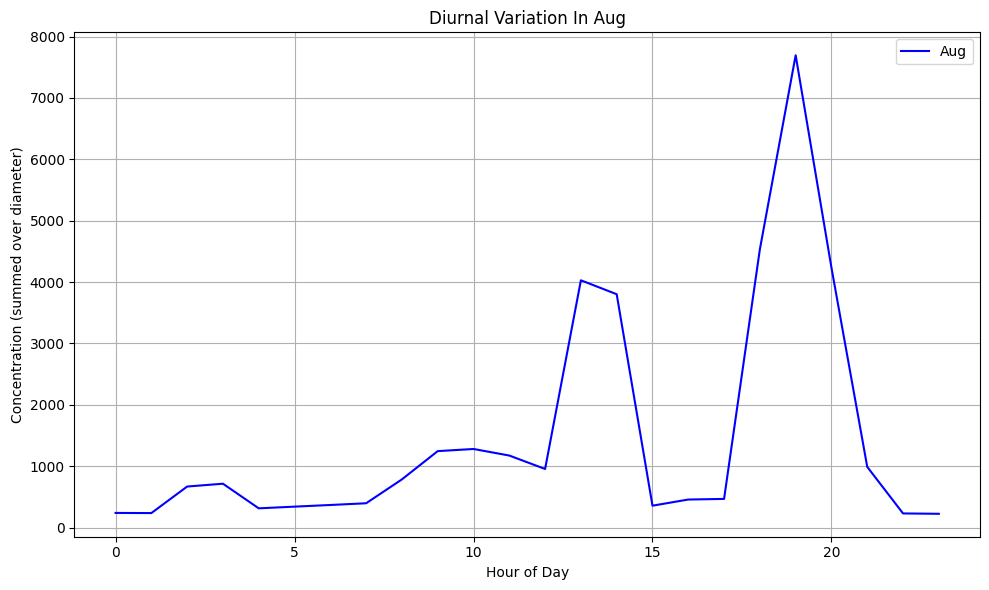

In [67]:
# Take the mean over diameter to have a line plot

plt.figure(figsize=(10, 6))
plt.plot(aug_diurnal_variation['hour'], aug_diurnal_variation.sum(dim='diameter'), label='Aug', color='blue')

# Customize the plot for ions
plt.title('Diurnal Variation In Aug')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (summed over diameter)')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

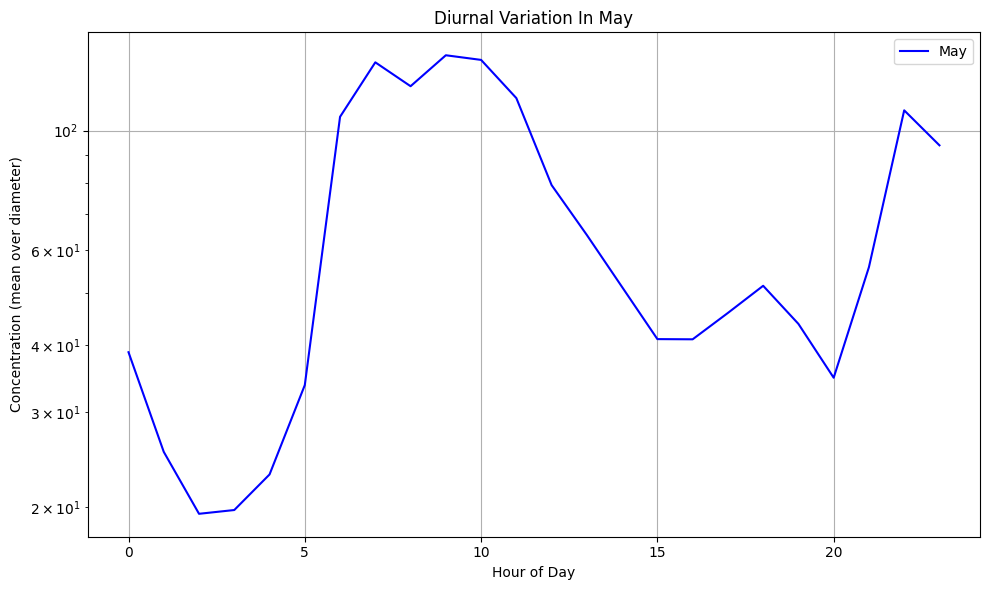

In [59]:
# Take the mean over diameter to have a line plot

plt.figure(figsize=(10, 6))
plt.plot(may_diurnal_variation['hour'], may_diurnal_variation.mean(dim='diameter'), label='May', color='blue')

# Customize the plot for ions
plt.title('Diurnal Variation In May')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Now for each day, we calculate the background and active times, ie; the median and max values

In [68]:
daily_median = rolling_median_sub.resample(time='1D').median()
daily_max = rolling_median_sub.resample(time='1D').max()
daily_change = daily_max - daily_median


In [72]:
daily_change

<xarray.DataArray 'neg_ions' (time: 108, diameter: 10)>
array([[ 63.44923977,  66.94460213,  62.51743909, ...,  48.5957705 ,
         70.15119052, 100.09378947],
       [341.96799625, 369.89187977, 444.13275672, ..., 679.41828323,
        569.35091233, 476.97351122],
       [ 11.59702275,  12.11591139,  12.18159504, ...,  12.67850398,
         16.65679387,  31.63802994],
       ...,
       [ 40.92534633,  45.09369958,  53.55753985, ...,  70.37373797,
         95.50819149, 164.62889667],
       [ 32.74029139,  48.8327373 ,  52.7637046 , ...,  72.31780666,
         66.57596402,  77.04302836],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * time      (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-09-01

In [79]:
daily_change.mean(dim='diameter') #biggest change is on 2024-08-07 of 22681.39555614

<xarray.DataArray 'neg_ions' (time: 108)>
array([6.51127303e+01, 5.48365193e+02, 1.32386576e+01, 1.16608596e+03,
       2.27379664e+02, 1.63204455e+02, 1.47276394e+02, 2.61866566e+02,
       3.22688838e+01, 1.29618700e+02, 2.46383458e+02, 2.29674869e+01,
       1.80472472e+02, 1.47864983e+02, 4.88939778e+02, 6.94720550e+02,
       1.11468641e+02, 1.87657533e+02, 2.24340332e+02, 1.99147178e+02,
       8.53025218e+01, 6.53038060e+01, 1.40835051e+02, 4.72038158e+01,
       2.73120886e+02, 1.59350914e+01, 1.12103553e+02, 3.75645253e+01,
       6.29991444e+01, 4.17914444e+01, 2.78857036e+02, 2.28655025e+02,
       1.43594603e+02, 6.96370403e+01, 5.53458148e+01, 2.88951640e+01,
       1.87380884e+02, 1.90280667e+02, 1.37980071e+02, 2.42290565e+02,
       3.34722501e+01, 8.05743233e+01, 1.50475228e+02, 2.86052483e+01,
       2.07567034e+01, 1.11551057e+02, 6.20954695e+02, 3.44903963e+02,
       9.13862144e+01, 1.71835608e+02, 5.79254612e+01, 3.17893638e+01,
       2.03707517e+02, 1.09786438e+02, 7.88491781e+01, 8.51218476e+01,
       1.29002215e+02, 8.02357810e+01, 3.73204141e+02, 8.08420798e+01,
       2.64767137e+02, 1.89666434e+02, 2.17697399e+02, 1.26266161e+02,
       2.68073546e+02, 3.59179197e+01, 4.80317187e+01, 1.73051928e+02,
       2.12317684e+02, 3.54344554e+02, 2.20943484e+02, 5.85330285e+01,
       1.54850146e+02, 2.71779645e+02, 1.33783254e+02, 3.54639217e+02,
       3.52697808e+01, 4.26871780e+01, 1.95186323e+02, 4.23977507e+02,
       3.50684975e+02, 3.36743966e+02, 2.26813956e+04, 1.07813571e+02,
       1.29801904e+02, 1.44484080e+02, 6.38531966e+01, 1.75989692e+02,
       1.30515935e+02, 2.58501022e+02, 8.01064100e+01, 6.70345744e+01,
       2.68344066e+02, 1.97624261e+02, 3.74295612e+02, 1.31645361e+03,
       2.37191982e+01, 1.38067705e+02, 8.71576646e+01, 8.34045560e+01,
       1.44982248e+02, 6.04381460e+01, 1.06025879e+04, 1.20429089e+02,
       1.04521660e+02, 7.50849010e+01, 5.90695946e+01, 0.00000000e+00])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-09-01

In [80]:

data = daily_change.mean(dim='diameter')
# Step 1: Calculate the 5% percentile intervals
percentiles = np.percentile(data, np.arange(0, 105, 5))  # 5% intervals from 0 to 100%

# Step 2: Use np.digitize to rank the data based on these percentile intervals
# The 'rank' array will contain indices of which percentile bin each value falls into
rank = np.digitize(data, percentiles)

# Step 3: Attach the rank as a new coordinate to the DataArray
data_with_rank = xr.DataArray(rank, dims="time", coords={"time": data["time"]})

# Step 4: Group by the calculated rank (each group corresponds to a 5% interval)
grouped_data = data.groupby(data_with_rank)

# Display the groups
for rank_value, group in grouped_data:
    print(f"Rank group {rank_value}:")
    print(group)


Rank group 1:
<xarray.DataArray 'neg_ions' (time: 6)>
array([13.23865759, 22.96748691, 15.93509138, 20.75670337, 23.71919822,
        0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-19 2024-05-28 ... 2024-09-01
Rank group 2:
<xarray.DataArray 'neg_ions' (time: 5)>
array([32.2688838 , 28.895164  , 33.47225008, 28.60524833, 31.7893638 ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-25 2024-06-21 ... 2024-07-07
Rank group 3:
<xarray.DataArray 'neg_ions' (time: 6)>
array([47.20381583, 37.5645253 , 41.79144436, 35.91791968, 35.26978077,
       42.68717803])
Coordinates:
  * time     (time) datetime64[ns] 2024-06-09 2024-06-13 ... 2024-08-02
Rank group 4:
<xarray.DataArray 'neg_ions' (time: 5)>
array([55.34581481, 57.92546115, 48.03171865, 58.53302855, 59.06959455])
Coordinates:
  * time     (time) datetime64[ns] 2024-06-20 2024-07-06 ... 2024-08-31
Rank group 5:
<xarray.DataArray 'neg_ions' (time: 5)>
array([65.11273032, 65.30380598, 62.99914441, 63.85319658,

In [86]:
# Initialize an empty dictionary to store the groups
grouped_dict = {}

# Loop over the groups and store them in the dictionary
for rank_value, group in grouped_data:
    grouped_dict[f"rank_group_{rank_value}"] = group

# Now, you can access each group using the dictionary, for example:
rank_group_1 = grouped_dict["rank_group_1"]
rank_group_2 = grouped_dict["rank_group_2"]

# Display one of the groups
print(rank_group_1)

<xarray.DataArray 'neg_ions' (time: 6)>
array([13.23865759, 22.96748691, 15.93509138, 20.75670337, 23.71919822,
        0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-19 2024-05-28 ... 2024-09-01


In [87]:
grouped_data

DataArrayGroupBy, grouped over 'group'
21 groups with labels 1, 2, 3, 4, 5, 6, ..., 17, 18, 19, 20, 21.

In [88]:
rank_group_3 = grouped_dict["rank_group_3"]
rank_group_4 = grouped_dict["rank_group_4"]
rank_group_5 = grouped_dict["rank_group_5"]
rank_group_6 = grouped_dict["rank_group_6"]
rank_group_7 = grouped_dict["rank_group_7"]
rank_group_8 = grouped_dict["rank_group_8"]
rank_group_9 = grouped_dict["rank_group_9"]
rank_group_10 = grouped_dict["rank_group_10"]
rank_group_11 = grouped_dict["rank_group_11"]
rank_group_12 = grouped_dict["rank_group_12"]
rank_group_13 = grouped_dict["rank_group_13"]
rank_group_14 = grouped_dict["rank_group_14"]
rank_group_15 = grouped_dict["rank_group_15"]
rank_group_16 = grouped_dict["rank_group_16"]
rank_group_17 = grouped_dict["rank_group_17"]
rank_group_18 = grouped_dict["rank_group_18"]
rank_group_19 = grouped_dict["rank_group_19"]
rank_group_20 = grouped_dict["rank_group_20"]
rank_group_21 = grouped_dict["rank_group_21"]

In [111]:
rank_group_21

<xarray.DataArray 'neg_ions' (time: 1)>
array([22681.39555614])
Coordinates:
  * time     (time) datetime64[ns] 2024-08-07

#### Get an example day for each of the percentiles and have their spectral plots to see whether the intensity of the NPF events increase

#### Redo with not just one day but the median for the days in each percentile

Percentile 0; [13.23865759, 22.96748691, 15.93509138, 20.75670337, 23.71919822,  0.        ]

['2024-05-19T00:00:00.000000000', '2024-05-28T00:00:00.000000000',
'2024-06-11T00:00:00.000000000', '2024-06-30T00:00:00.000000000',
'2024-08-21T00:00:00.000000000', '2024-09-01T00:00:00.000000000']

Percentile 5; [32.2688838 , 28.895164  , 33.47225008, 28.60524833, 31.7893638 ]

['2024-05-25T00:00:00.000000000', '2024-06-21T00:00:00.000000000',
'2024-06-26T00:00:00.000000000', '2024-06-29T00:00:00.000000000',
'2024-07-07T00:00:00.000000000']

Percentile 10; [47.20381583, 37.5645253 , 41.79144436, 35.91791968, 35.26978077, 42.68717803]

['2024-06-09T00:00:00.000000000', '2024-06-13T00:00:00.000000000',
'2024-06-15T00:00:00.000000000', '2024-07-21T00:00:00.000000000',
'2024-08-01T00:00:00.000000000', '2024-08-02T00:00:00.000000000']

Percentile 15; [55.34581481, 57.92546115, 48.03171865, 58.53302855, 59.06959455]

['2024-06-20T00:00:00.000000000', '2024-07-06T00:00:00.000000000',
'2024-07-22T00:00:00.000000000', '2024-07-27T00:00:00.000000000',
'2024-08-31T00:00:00.000000000']

Percentile 20; [65.11273032, 65.30380598, 62.99914441, 63.85319658, 60.438146  ]

['2024-05-17T00:00:00.000000000', '2024-06-07T00:00:00.000000000',
'2024-06-14T00:00:00.000000000', '2024-08-11T00:00:00.000000000',
'2024-08-26T00:00:00.000000000']

Percentile 25; [69.63704029, 78.8491781 , 80.23578103, 80.10640999, 67.03457437, 75.08490095]

['2024-06-19T00:00:00.000000000', '2024-07-10T00:00:00.000000000',
'2024-07-13T00:00:00.000000000', '2024-08-15T00:00:00.000000000',
'2024-08-16T00:00:00.000000000', '2024-08-30T00:00:00.000000000']

Percentile 30; [85.30252183, 80.57432328, 85.12184757, 80.84207983, 83.40455602]

['2024-06-06T00:00:00.000000000', '2024-06-27T00:00:00.000000000',
'2024-07-11T00:00:00.000000000', '2024-07-15T00:00:00.000000000',
'2024-08-24T00:00:00.000000000']

Percentile 35; [ 91.38621441, 109.78643832, 107.81357137,  87.15766457, 104.52166045]

['2024-07-04T00:00:00.000000000', '2024-07-09T00:00:00.000000000',
'2024-08-08T00:00:00.000000000', '2024-08-23T00:00:00.000000000',
'2024-08-29T00:00:00.000000000']

Percentile 40; [111.46864134, 112.10355279, 111.55105732, 129.00221546, 126.26616116, 120.42908893]

['2024-06-02T00:00:00.000000000', '2024-06-12T00:00:00.000000000',
'2024-07-01T00:00:00.000000000', '2024-07-12T00:00:00.000000000',
'2024-07-19T00:00:00.000000000', '2024-08-28T00:00:00.000000000']

Percentile 45; [129.6187003 , 137.98007122, 133.78325444, 129.80190441, 130.51593535]

['2024-05-26T00:00:00.000000000', '2024-06-24T00:00:00.000000000',
'2024-07-30T00:00:00.000000000', '2024-08-09T00:00:00.000000000',
'2024-08-13T00:00:00.000000000']

Percentile 50; [140.83505148, 143.59460314, 144.48408032, 138.06770474, 144.98224812]

['2024-06-08T00:00:00.000000000', '2024-06-18T00:00:00.000000000',
'2024-08-10T00:00:00.000000000', '2024-08-22T00:00:00.000000000',
'2024-08-25T00:00:00.000000000']

Percentile 55; [163.20445459, 147.276394  , 147.86498273, 150.47522799, 171.83560752, 154.85014643]

['2024-05-22T00:00:00.000000000', '2024-05-23T00:00:00.000000000',
'2024-05-30T00:00:00.000000000', '2024-06-28T00:00:00.000000000',
'2024-07-05T00:00:00.000000000', '2024-07-28T00:00:00.000000000']

Percentile 60; [180.47247177, 187.65753331, 187.38088366, 173.05192842,  175.98969199]

['2024-05-29T00:00:00.000000000', '2024-06-03T00:00:00.000000000',
'2024-06-22T00:00:00.000000000', '2024-07-23T00:00:00.000000000',
'2024-08-12T00:00:00.000000000']

Percentile 65; [199.14717755, 190.28066696, 189.66643443, 195.18632345, 197.62426109]

['2024-06-05T00:00:00.000000000', '2024-06-23T00:00:00.000000000',
'2024-07-17T00:00:00.000000000', '2024-08-03T00:00:00.000000000',
'2024-08-18T00:00:00.000000000']

Percentile 70; [227.37966438, 224.3403316 , 203.70751673, 217.69739889, 212.3176842 , 220.94348357]

['2024-05-21T00:00:00.000000000', '2024-06-04T00:00:00.000000000',
'2024-07-08T00:00:00.000000000', '2024-07-18T00:00:00.000000000',
'2024-07-24T00:00:00.000000000', '2024-07-26T00:00:00.000000000']

Percentile 75; [261.86656633, 246.38345753, 228.65502509, 242.29056463,  258.50102199]

['2024-05-24T00:00:00.000000000', '2024-05-27T00:00:00.000000000',
'2024-06-17T00:00:00.000000000', '2024-06-25T00:00:00.000000000',
'2024-08-14T00:00:00.000000000']

Percentile 80; [273.12088626, 264.76713745, 268.07354591, 271.77964543, 268.34406632]

['2024-06-10T00:00:00.000000000', '2024-07-16T00:00:00.000000000',
'2024-07-20T00:00:00.000000000', '2024-07-29T00:00:00.000000000',
'2024-08-17T00:00:00.000000000']

Percentile 85; [278.85703585, 344.90396287, 354.34455449, 354.6392175 ,  350.68497494, 336.74396647]

['2024-06-16T00:00:00.000000000', '2024-07-03T00:00:00.000000000',
'2024-07-25T00:00:00.000000000', '2024-07-31T00:00:00.000000000',
'2024-08-05T00:00:00.000000000', '2024-08-06T00:00:00.000000000']

Percentile 90; [548.36519281, 488.93977817, 373.2041412 , 423.97750689, 374.29561206]

['2024-05-18T00:00:00.000000000', '2024-05-31T00:00:00.000000000',
'2024-07-14T00:00:00.000000000', '2024-08-04T00:00:00.000000000',
'2024-08-19T00:00:00.000000000']

Percentile 95; [ 1166.08595684,   694.72055004,   620.9546945 ,  1316.45360792, 10602.58791211]

['2024-05-20T00:00:00.000000000', '2024-06-01T00:00:00.000000000',
'2024-07-02T00:00:00.000000000', '2024-08-20T00:00:00.000000000',
'2024-08-27T00:00:00.000000000']

Percentile 100; [22681.39555614]

['2024-08-07T00:00:00.000000000'] 

21st Aug, 26th June, 9th June, 31st Aug, 7th June, 13th July, 6th June, 9th July, 12th July, 24th June, 25th Aug, 5th July, 3rd June, 5th June, 21st May, 24th May, 10th June, 31st July, 18th May, 27th Aug, 7th Aug

In [113]:
ds['neg_ions'].sel(time=slice('2024-08-21','2024-08-21'))

<xarray.DataArray 'neg_ions' (time: 24, diameter: 55)>
array([[ 794.356173, 1401.846612, 1924.649147, ...,  561.107463,  535.571663,
                nan],
       [ 977.971617, 1539.061117, 2140.207917, ...,  342.535231,  405.988494,
                nan],
       [ 953.564937, 1382.121297, 1823.261012, ...,  447.752923,  469.065221,
                nan],
       ...,
       [ 563.714373,  806.370808,  981.926525, ...,  953.613941, 1120.347784,
                nan],
       [ 519.578259,  850.902095,  890.263425, ...,  993.039972, 1036.924879,
                nan],
       [ 584.273723,  907.176083, 1199.575708, ..., 1051.70281 , 1212.362007,
                nan]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-08-21 ... 2024-08-21T23:00:00
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [114]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], var.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)


/tmp/ipykernel_6463/2635516519.py:9: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], var.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
/tmp/ipykernel_6463/2635516519.py:9: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], var.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
/tmp/ipykernel_6463/2635516519.py:9: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(var['time'], var['diameter'], var.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)


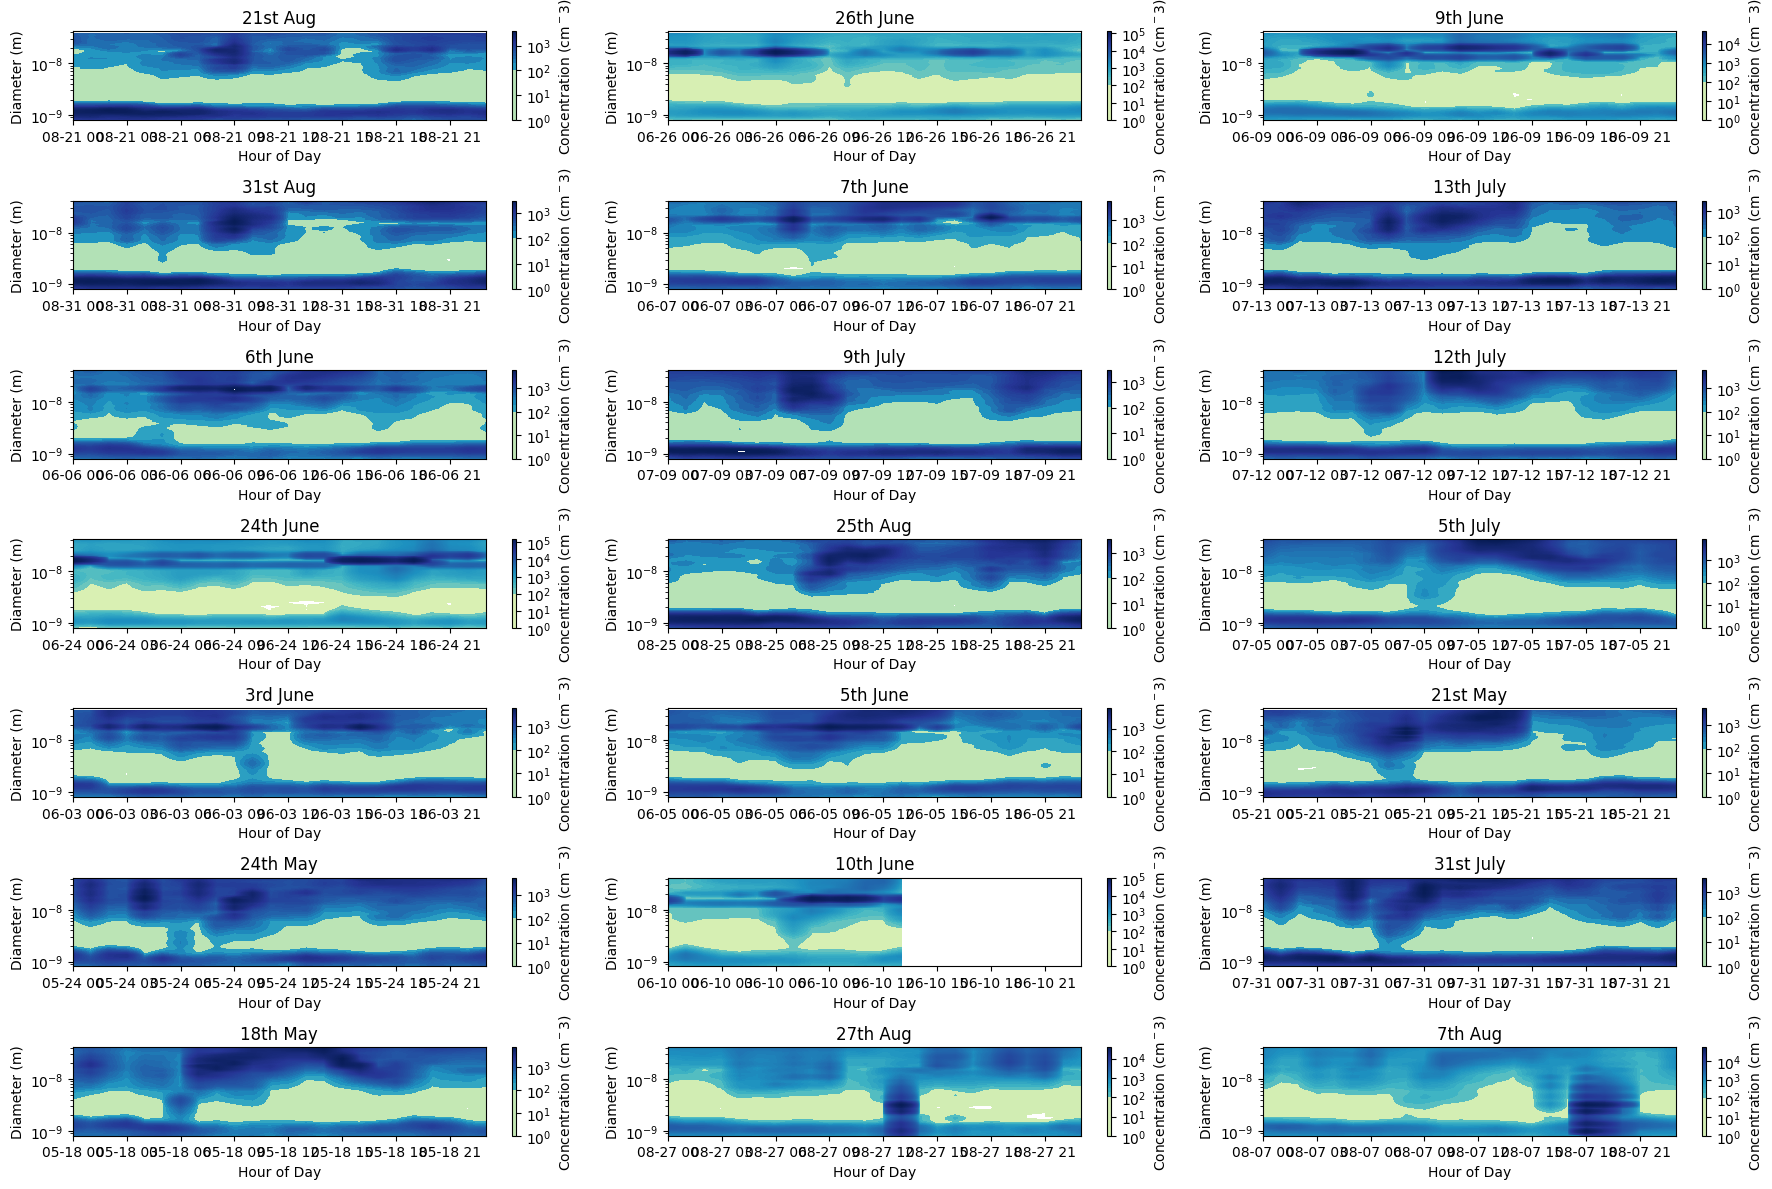

In [115]:

# Set up the plots
fig, axs = plt.subplots(7, 3, figsize=(18, 12))
axs = axs.ravel()

plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-21','2024-08-21')), '21st Aug', axs[0])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-26','2024-06-26')), '26th June', axs[1])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-09','2024-06-09')), '9th June', axs[2])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-31','2024-08-31')), '31st Aug', axs[3])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-07','2024-06-07')), '7th June', axs[4])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-13','2024-07-13')), '13th July', axs[5])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-06','2024-06-06')), '6th June', axs[6])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-09','2024-07-09')), '9th July', axs[7])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-12','2024-07-12')), '12th July', axs[8])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-24','2024-06-24')), '24th June', axs[9])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-25','2024-08-25')), '25th Aug', axs[10])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-05','2024-07-05')), '5th July', axs[11])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-03','2024-06-03')), '3rd June', axs[12])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-05','2024-06-05')), '5th June', axs[13])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-21','2024-05-21')), '21st May', axs[14])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-24','2024-05-24')), '24th May', axs[15])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-10','2024-06-10')), '10th June', axs[16])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-31','2024-07-31')), '31st July', axs[17])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-18','2024-05-18')), '18th May', axs[18])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-27','2024-08-27')), '27th Aug', axs[19])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-07','2024-08-07')), '7th Aug', axs[20])

plt.tight_layout()
plt.show()

In [124]:
# Function to plot the ds with non-negative colorbars
from numpy import ma
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = ma.masked_where(var <= 0, var)
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,locator=ticker.LogLocator(), cmap=cm.coolwarm)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)
    

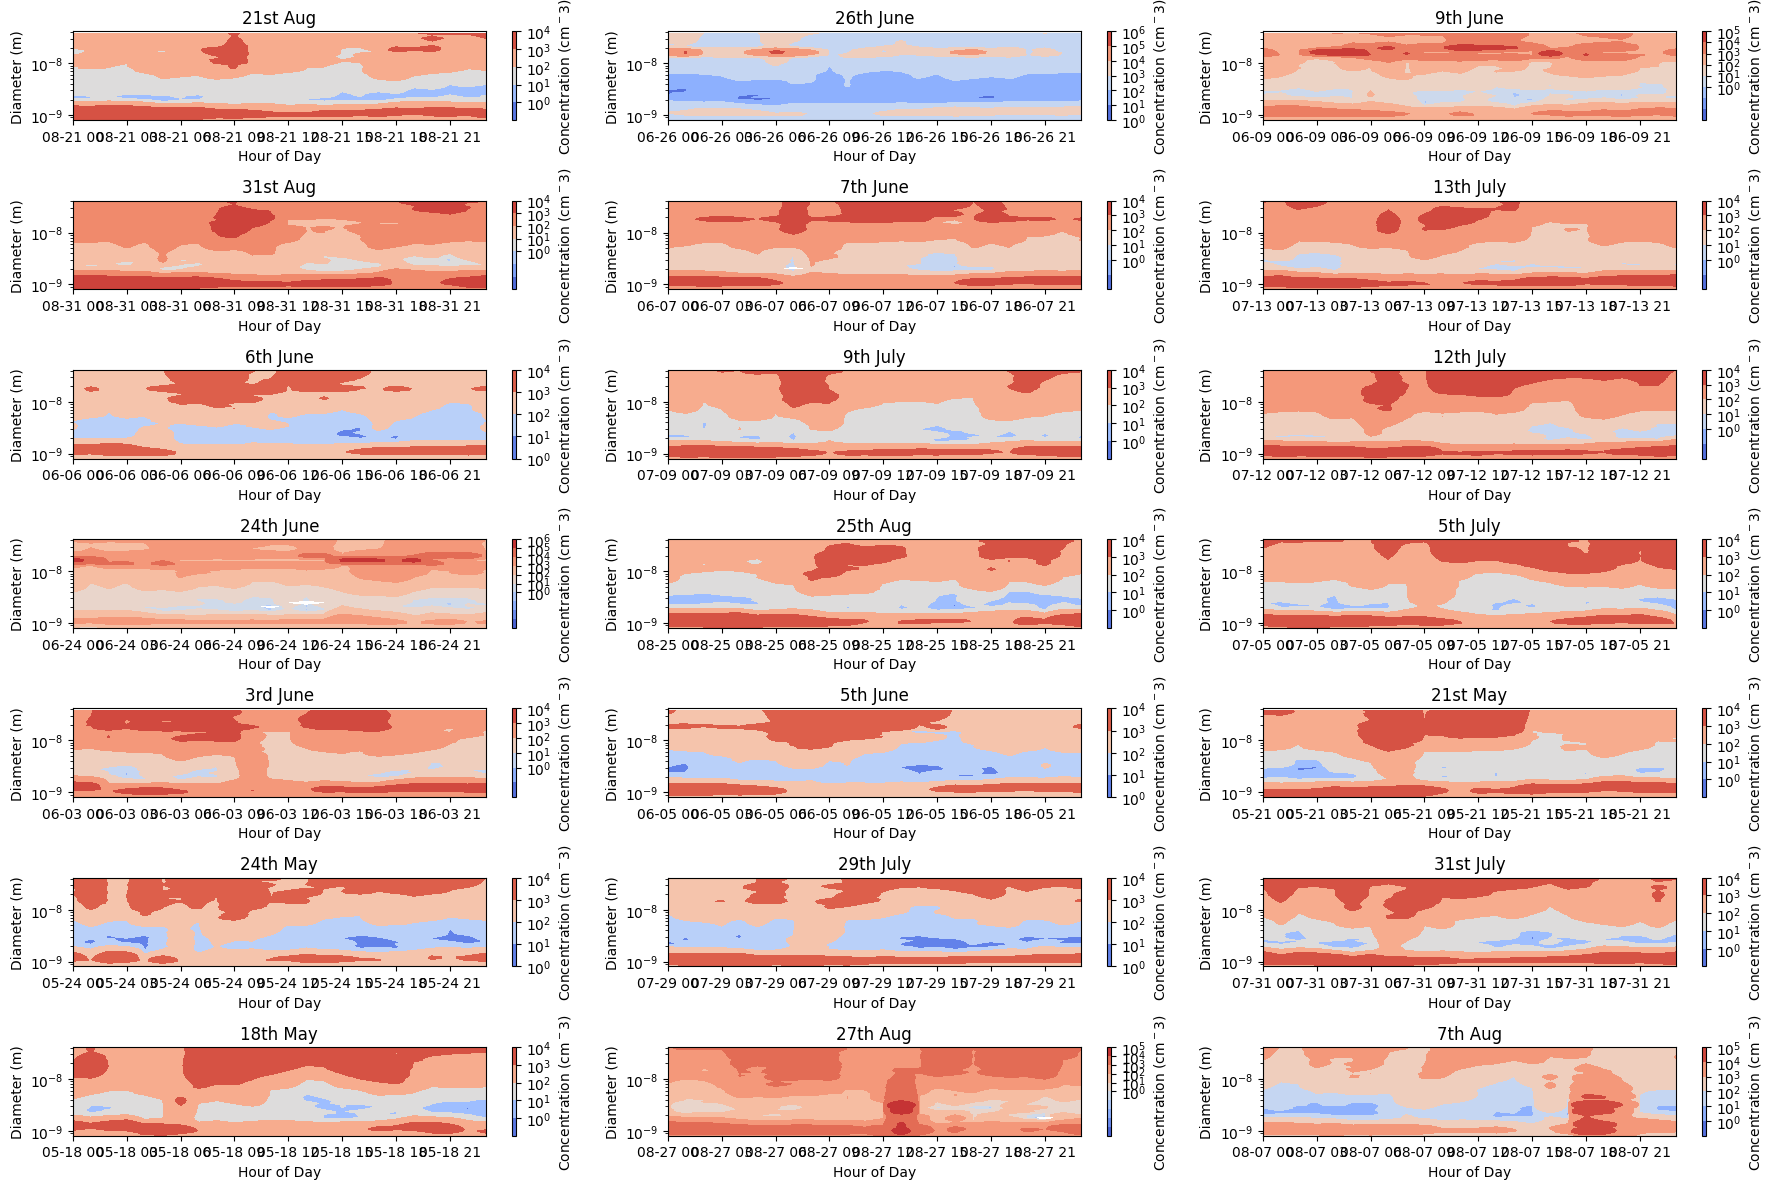

In [125]:
# Set up the plots
fig, axs = plt.subplots(7, 3, figsize=(18, 12))
axs = axs.ravel()

plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-21','2024-08-21')), '21st Aug', axs[0])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-26','2024-06-26')), '26th June', axs[1])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-09','2024-06-09')), '9th June', axs[2])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-31','2024-08-31')), '31st Aug', axs[3])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-07','2024-06-07')), '7th June', axs[4])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-13','2024-07-13')), '13th July', axs[5])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-06','2024-06-06')), '6th June', axs[6])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-09','2024-07-09')), '9th July', axs[7])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-12','2024-07-12')), '12th July', axs[8])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-24','2024-06-24')), '24th June', axs[9])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-25','2024-08-25')), '25th Aug', axs[10])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-05','2024-07-05')), '5th July', axs[11])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-03','2024-06-03')), '3rd June', axs[12])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-05','2024-06-05')), '5th June', axs[13])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-21','2024-05-21')), '21st May', axs[14])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-24','2024-05-24')), '24th May', axs[15])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-29','2024-07-29')), '29th July', axs[16])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-31','2024-07-31')), '31st July', axs[17])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-18','2024-05-18')), '18th May', axs[18])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-27','2024-08-27')), '27th Aug', axs[19])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-07','2024-08-07')), '7th Aug', axs[20])

plt.tight_layout()
plt.show()

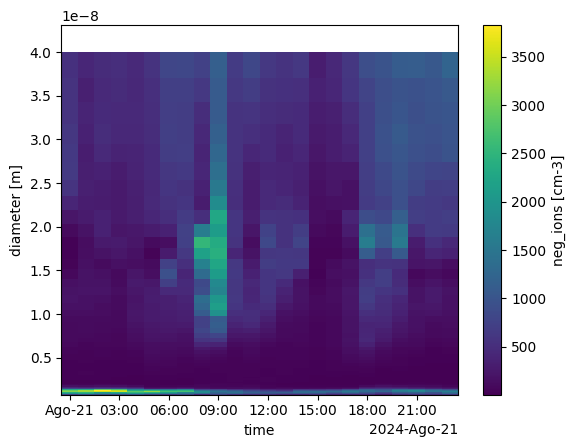

In [140]:
ds['neg_ions'].sel(time=slice('2024-08-21','2024-08-21')).T.plot()


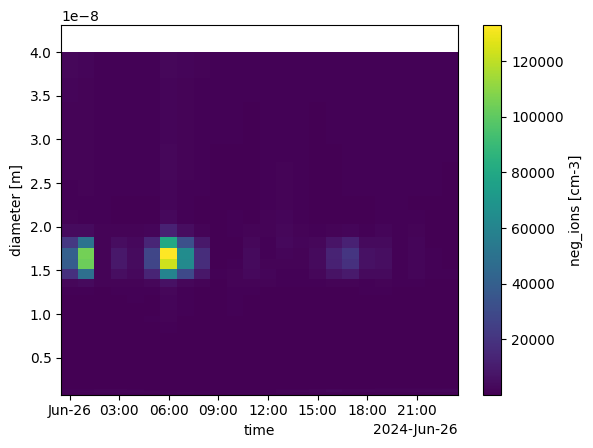

In [141]:
ds['neg_ions'].sel(time=slice('2024-06-26','2024-06-26')).T.plot()

In [132]:
# Function to plot the ds with non-negative colorbars
from numpy import ma
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = ma.masked_where(var <= 0, var)
    # Plot the contour
    #levels = np.logspace(np.log10(1), np.log10(masked_data.max()), num=10) - too many errors of handling
    #plt.contourf(data, levels=levels, locator=ticker.LogLocator())
    levels=np.arange(1,var.max().item(),100)

    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=levels,locator=ticker.LogLocator(), cmap=cm.coolwarm)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)
    

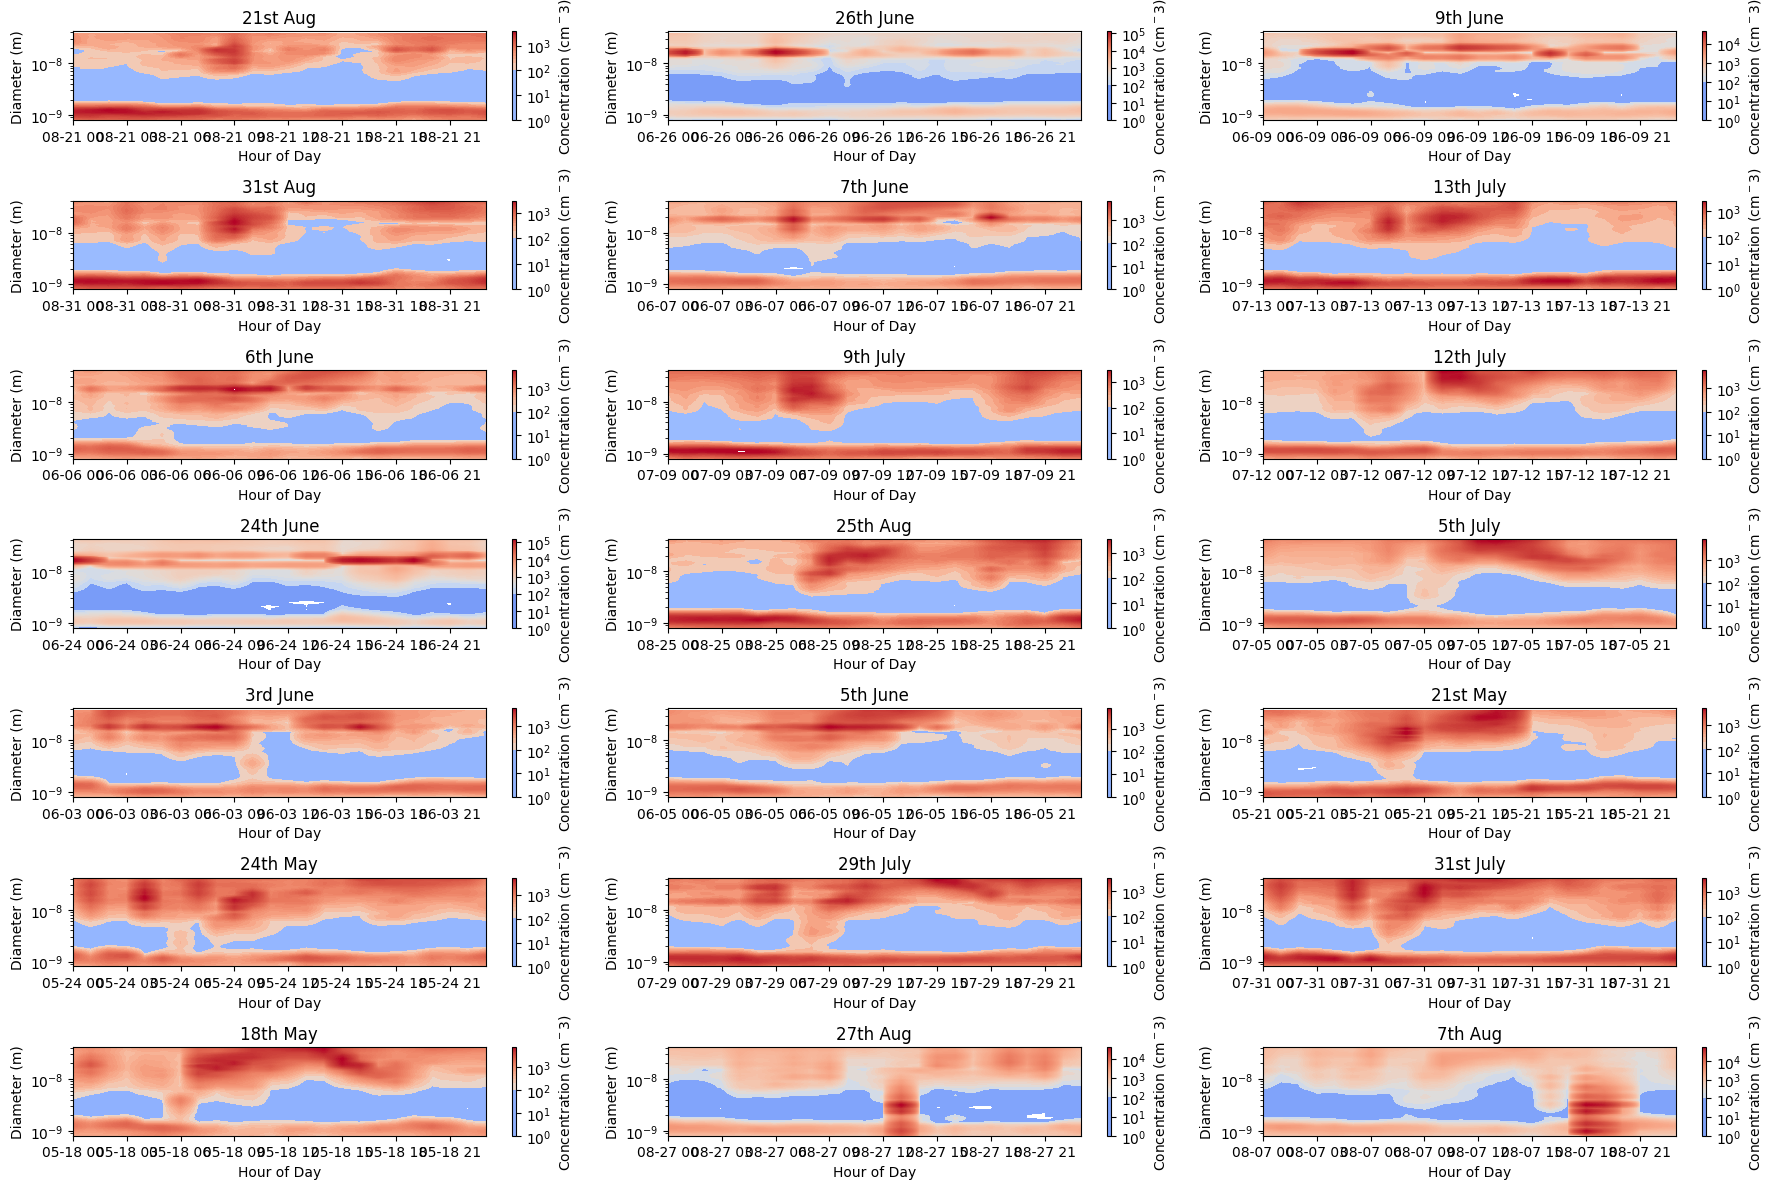

In [133]:
# Set up the plots
fig, axs = plt.subplots(7, 3, figsize=(18, 12))
axs = axs.ravel()

plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-21','2024-08-21')), '21st Aug', axs[0])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-26','2024-06-26')), '26th June', axs[1])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-09','2024-06-09')), '9th June', axs[2])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-31','2024-08-31')), '31st Aug', axs[3])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-07','2024-06-07')), '7th June', axs[4])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-13','2024-07-13')), '13th July', axs[5])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-06','2024-06-06')), '6th June', axs[6])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-09','2024-07-09')), '9th July', axs[7])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-12','2024-07-12')), '12th July', axs[8])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-24','2024-06-24')), '24th June', axs[9])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-25','2024-08-25')), '25th Aug', axs[10])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-05','2024-07-05')), '5th July', axs[11])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-03','2024-06-03')), '3rd June', axs[12])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-05','2024-06-05')), '5th June', axs[13])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-21','2024-05-21')), '21st May', axs[14])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-24','2024-05-24')), '24th May', axs[15])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-29','2024-07-29')), '29th July', axs[16])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-31','2024-07-31')), '31st July', axs[17])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-18','2024-05-18')), '18th May', axs[18])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-27','2024-08-27')), '27th Aug', axs[19])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-07','2024-08-07')), '7th Aug', axs[20])

plt.tight_layout()
plt.show()

In [147]:
# Function to plot the ds with non-negative colorbars
from numpy import ma
import matplotlib.dates as mdates
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = ma.masked_where(var <= 0, var)
    # Plot the contour
    #levels = np.logspace(np.log10(1), np.log10(masked_data.max()), num=10) - too many errors of handling
    #plt.contourf(data, levels=levels, locator=ticker.LogLocator())
    levels=np.arange(1,var.max().item(),100)

    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=levels,locator=ticker.LogLocator(), cmap=cm.viridis)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    # Formatting the x-axis
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))  # Show only the hour
    #plt.xticks(rotation=45)  # Rotate tick labels for better visibility - only appearing on the last plot and not helping
    ax.set_title(title)
    

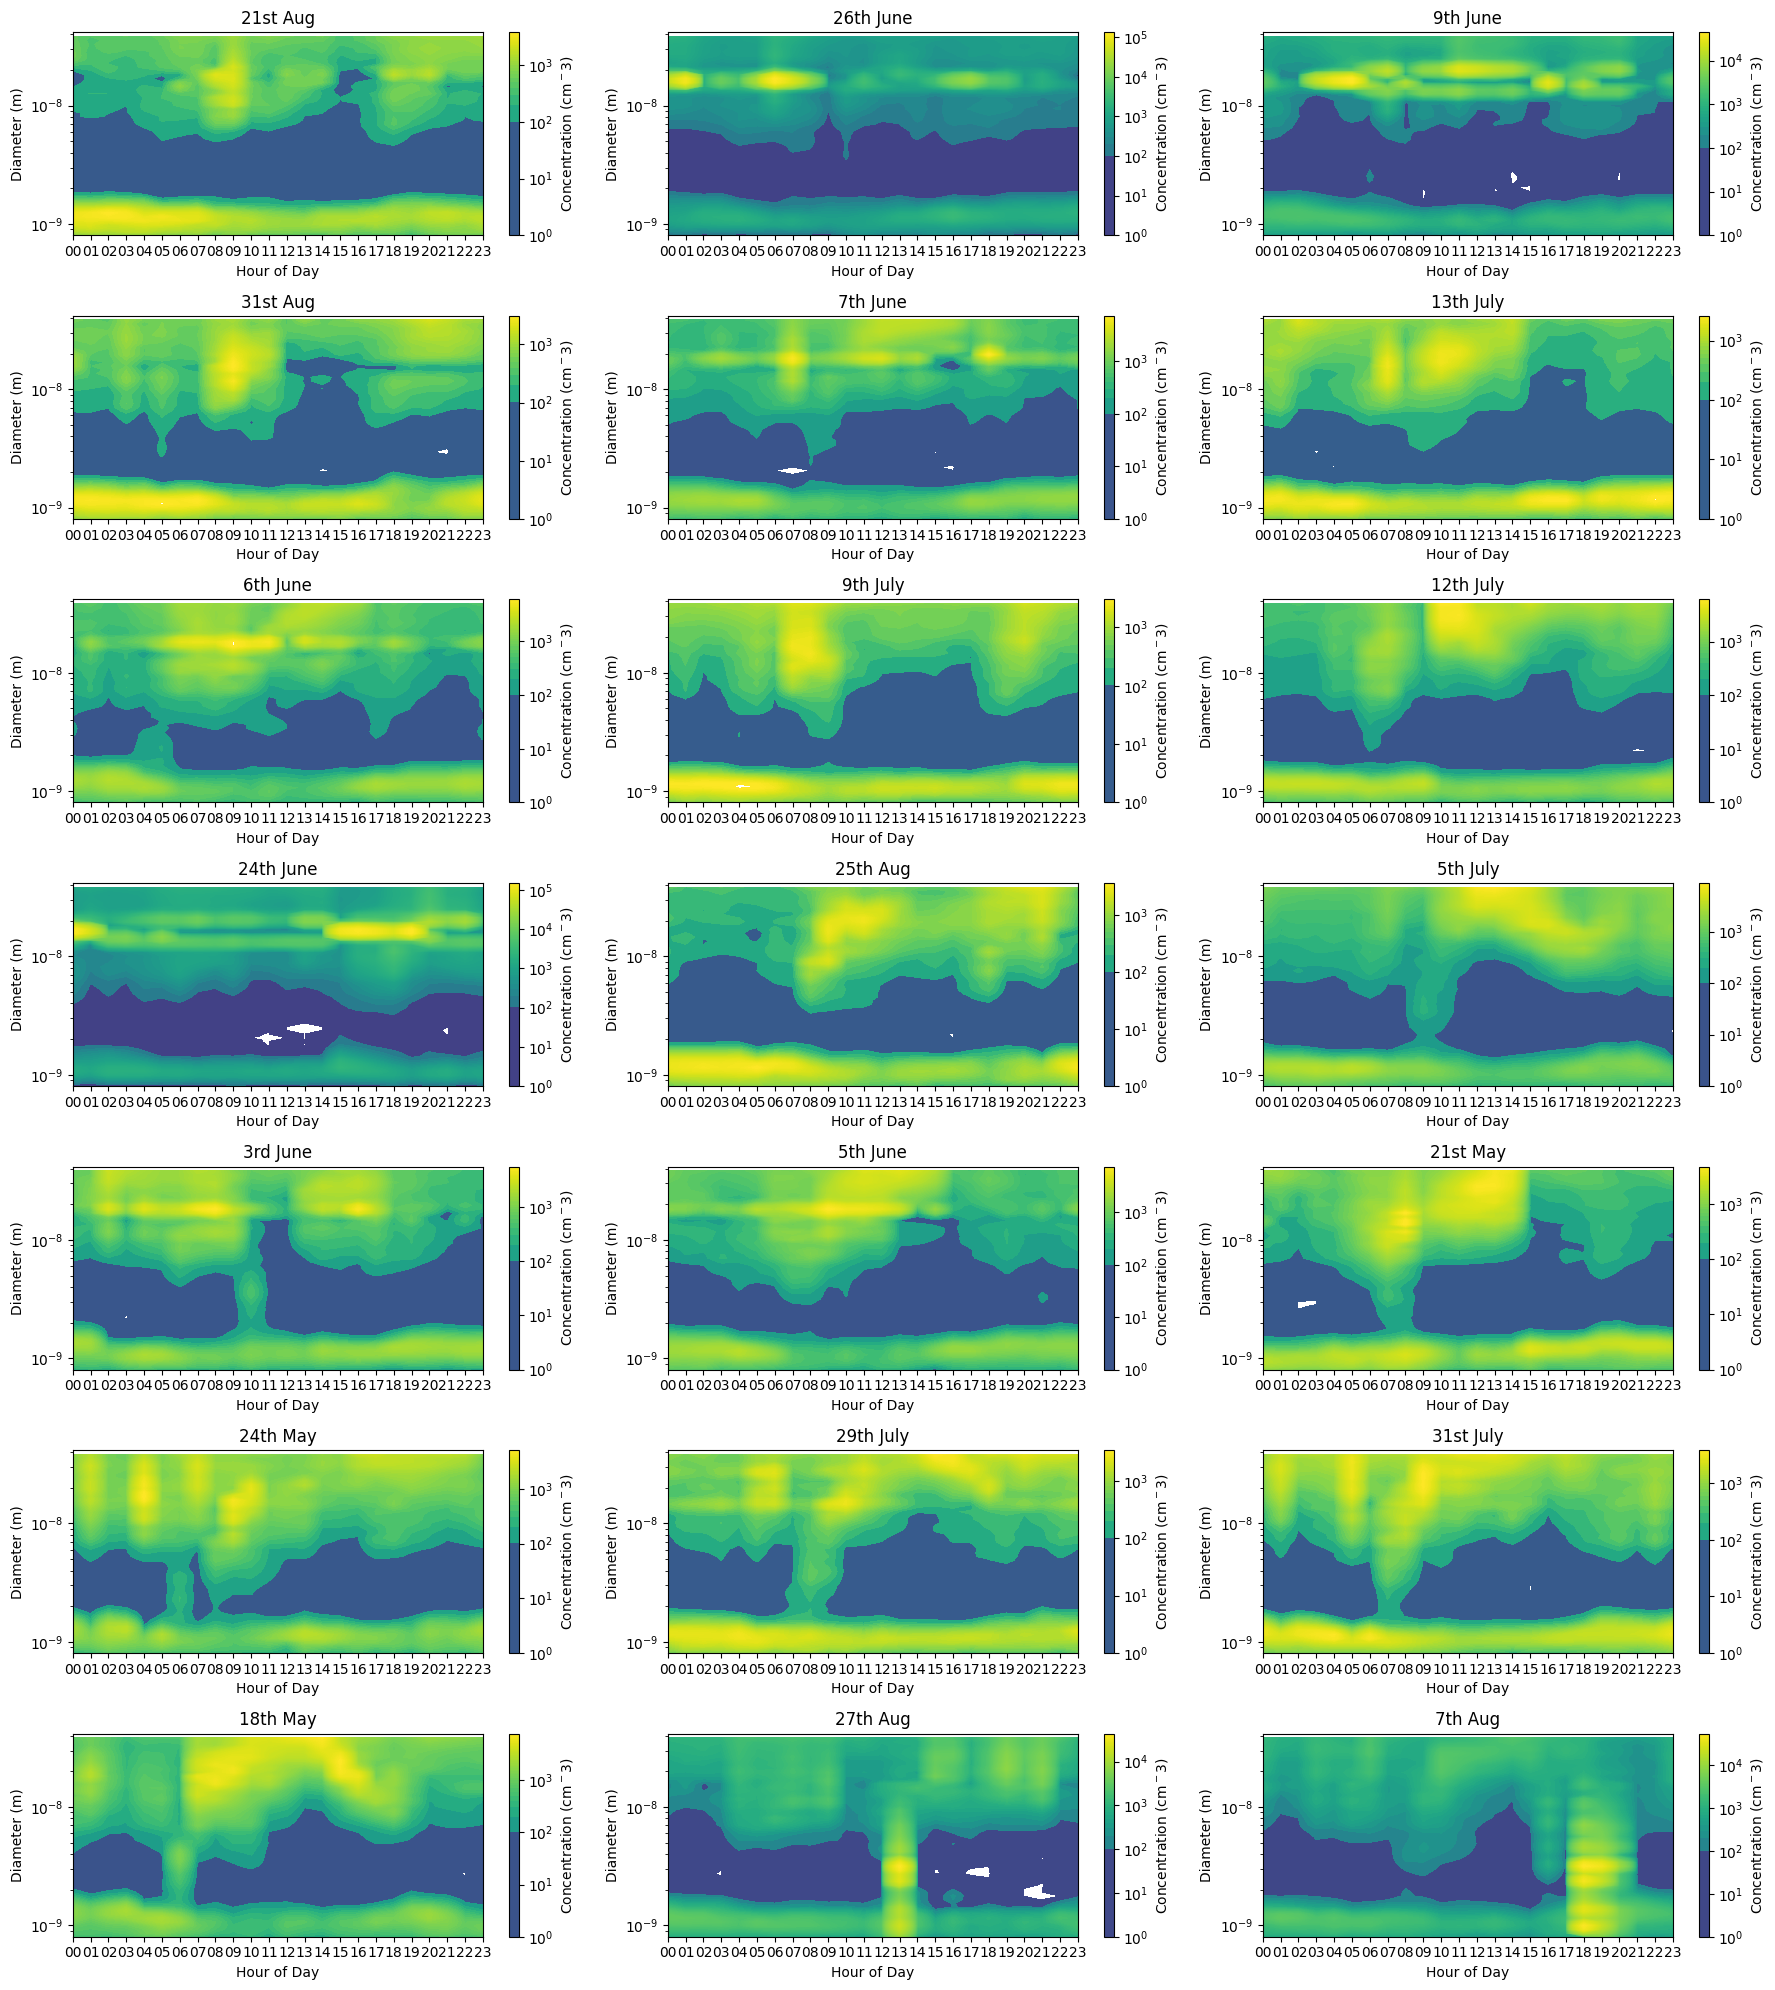

In [148]:
# Set up the plots
fig, axs = plt.subplots(7, 3, figsize=(18, 20))
axs = axs.ravel()

plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-21','2024-08-21')), '21st Aug', axs[0])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-26','2024-06-26')), '26th June', axs[1])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-09','2024-06-09')), '9th June', axs[2])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-31','2024-08-31')), '31st Aug', axs[3])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-07','2024-06-07')), '7th June', axs[4])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-13','2024-07-13')), '13th July', axs[5])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-06','2024-06-06')), '6th June', axs[6])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-09','2024-07-09')), '9th July', axs[7])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-12','2024-07-12')), '12th July', axs[8])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-24','2024-06-24')), '24th June', axs[9])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-25','2024-08-25')), '25th Aug', axs[10])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-05','2024-07-05')), '5th July', axs[11])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-03','2024-06-03')), '3rd June', axs[12])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-06-05','2024-06-05')), '5th June', axs[13])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-21','2024-05-21')), '21st May', axs[14])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-24','2024-05-24')), '24th May', axs[15])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-29','2024-07-29')), '29th July', axs[16])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-07-31','2024-07-31')), '31st July', axs[17])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-05-18','2024-05-18')), '18th May', axs[18])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-27','2024-08-27')), '27th Aug', axs[19])
plot_spectral_data(ds['neg_ions'].sel(time=slice('2024-08-07','2024-08-07')), '7th Aug', axs[20])

plt.tight_layout()
plt.show()

### NPF Mode Fitting

In [149]:
data

<xarray.DataArray 'neg_ions' (time: 108)>
array([6.51127303e+01, 5.48365193e+02, 1.32386576e+01, 1.16608596e+03,
       2.27379664e+02, 1.63204455e+02, 1.47276394e+02, 2.61866566e+02,
       3.22688838e+01, 1.29618700e+02, 2.46383458e+02, 2.29674869e+01,
       1.80472472e+02, 1.47864983e+02, 4.88939778e+02, 6.94720550e+02,
       1.11468641e+02, 1.87657533e+02, 2.24340332e+02, 1.99147178e+02,
       8.53025218e+01, 6.53038060e+01, 1.40835051e+02, 4.72038158e+01,
       2.73120886e+02, 1.59350914e+01, 1.12103553e+02, 3.75645253e+01,
       6.29991444e+01, 4.17914444e+01, 2.78857036e+02, 2.28655025e+02,
       1.43594603e+02, 6.96370403e+01, 5.53458148e+01, 2.88951640e+01,
       1.87380884e+02, 1.90280667e+02, 1.37980071e+02, 2.42290565e+02,
       3.34722501e+01, 8.05743233e+01, 1.50475228e+02, 2.86052483e+01,
       2.07567034e+01, 1.11551057e+02, 6.20954695e+02, 3.44903963e+02,
       9.13862144e+01, 1.71835608e+02, 5.79254612e+01, 3.17893638e+01,
       2.03707517e+02, 1.09786438e+02, 7.88491781e+01, 8.51218476e+01,
       1.29002215e+02, 8.02357810e+01, 3.73204141e+02, 8.08420798e+01,
       2.64767137e+02, 1.89666434e+02, 2.17697399e+02, 1.26266161e+02,
       2.68073546e+02, 3.59179197e+01, 4.80317187e+01, 1.73051928e+02,
       2.12317684e+02, 3.54344554e+02, 2.20943484e+02, 5.85330285e+01,
       1.54850146e+02, 2.71779645e+02, 1.33783254e+02, 3.54639217e+02,
       3.52697808e+01, 4.26871780e+01, 1.95186323e+02, 4.23977507e+02,
       3.50684975e+02, 3.36743966e+02, 2.26813956e+04, 1.07813571e+02,
       1.29801904e+02, 1.44484080e+02, 6.38531966e+01, 1.75989692e+02,
       1.30515935e+02, 2.58501022e+02, 8.01064100e+01, 6.70345744e+01,
       2.68344066e+02, 1.97624261e+02, 3.74295612e+02, 1.31645361e+03,
       2.37191982e+01, 1.38067705e+02, 8.71576646e+01, 8.34045560e+01,
       1.44982248e+02, 6.04381460e+01, 1.06025879e+04, 1.20429089e+02,
       1.04521660e+02, 7.50849010e+01, 5.90695946e+01, 0.00000000e+00])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-09-01

In [151]:
np.log(data[:-1]) # to avoid division by 0

<xarray.DataArray 'neg_ions' (time: 107)>
array([ 4.17612008,  6.30694148,  2.58314115,  7.06140808,  5.42662115,
        5.09500374,  4.99231105,  5.56783509,  3.47410342,  4.86459707,
        5.50688909,  3.1340796 ,  5.19557826,  4.99629958,  6.19223933,
        6.54350968,  4.71374331,  5.23461867,  5.41316424,  5.29404414,
        4.44620402,  4.17905032,  4.94758936,  3.85447473,  5.6099145 ,
        2.76852368,  4.71942302,  3.62606013,  4.14312115,  3.73269164,
        5.63069923,  5.43221443,  4.96699407,  4.24329661,  4.01360104,
        3.36367425,  5.23314336,  5.24850018,  4.92710926,  5.49013769,
        3.51071674,  4.38918003,  5.01379847,  3.35359021,  3.03286925,
        4.7144824 ,  6.43125812,  5.84326601,  4.51509464,  5.14653825,
        4.05915703,  3.45913176,  5.31668522,  4.69853701,  4.36753689,
        4.44408373,  4.85982958,  4.38496956,  5.92212557,  4.39249762,
        5.57885071,  5.24526692,  5.38310602,  4.83839207,  5.59126137,
        3.58123633,  3.8718616 ,  5.15359171,  5.35808366,  5.87026976,
        5.39790694,  4.06959119,  5.04245785,  5.60499161,  4.89622099,
        5.87110098,  3.56302653,  3.75389859,  5.27395461,  6.0496804 ,
        5.85988831,  5.8193229 , 10.02930029,  4.68040354,  4.86600948,
        4.97316933,  4.15658665,  5.17042543,  4.87149533,  5.55489965,
        4.38335588,  4.20520852,  5.59226999,  5.28636756,  5.92504589,
        7.18269674,  3.16628477,  4.92774418,  4.46771871,  4.42370294,
        4.97661131,  4.10162046,  9.26885339,  4.79106111,  4.64939433,
        4.31861949,  4.07871632])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-08-31

(array([0.07530697, 0.03765348, 0.07530697, 0.2259209 , 0.15061393,
        0.18826742, 0.33888135, 0.37653484, 0.26357439, 0.60245574,
        0.4518418 , 0.37653484, 0.26357439, 0.30122787, 0.03765348,
        0.11296045, 0.        , 0.        , 0.07530697, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03765348, 0.        , 0.        , 0.03765348]),
 array([ 2.58314115,  2.83134646,  3.07955176,  3.32775707,  3.57596237,
         3.82416768,  4.07237298,  4.32057829,  4.56878359,  4.81698889,
         5.0651942 ,  5.3133995 ,  5.56160481,  5.80981011,  6.05801542,
         6.30622072,  6.55442603,  6.80263133,  7.05083663,  7.29904194,
         7.54724724,  7.79545255,  8.04365785,  8.29186316,  8.54006846,
         8.78827377,  9.03647907,  9.28468438,  9.53288968,  9.78109498,
        10.02930029]),
 <BarContainer object of 30 artists>)

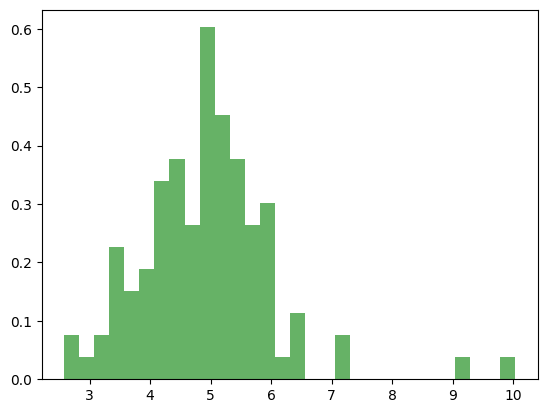

In [152]:
log_dist = np.log(data[:-1])
plt.hist(log_dist, bins=30, density=True, alpha=0.6, color='g')

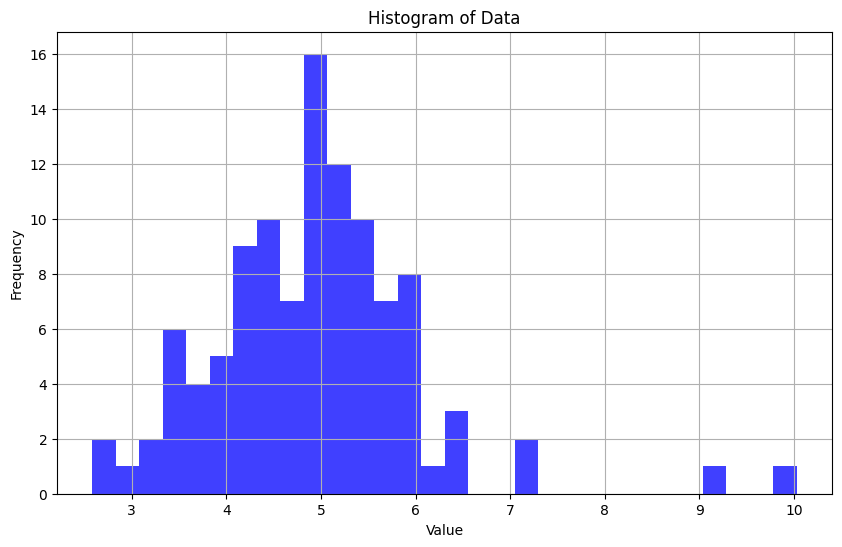

In [153]:

# Flatten the data to a 1D array
flattened_data = log_dist.values.flatten()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(flattened_data, bins=30, alpha=0.75, color='blue')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


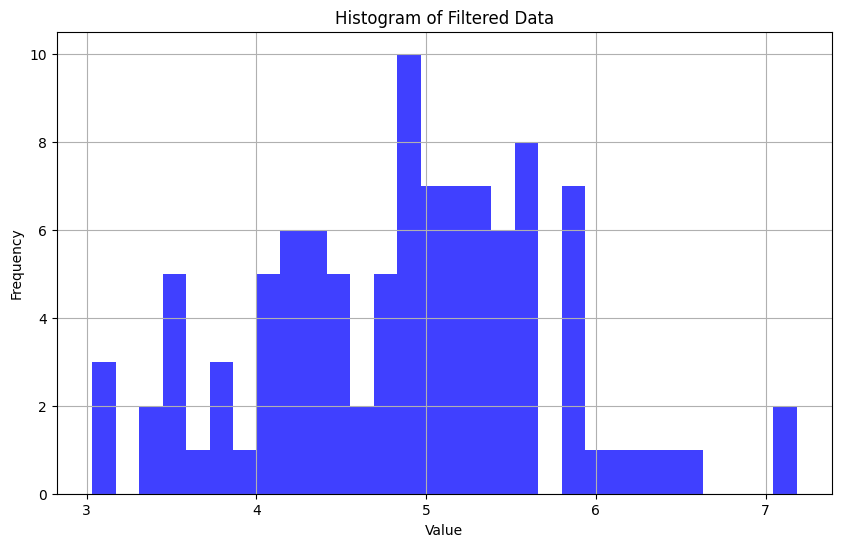

In [158]:
# Calculate percentiles
p1, p99 = np.percentile(flattened_data, [1, 99])

# Filter data between the 1st and 99th percentiles
filtered_data = flattened_data[(flattened_data >= p1) & (flattened_data <= p99)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=30, alpha=0.75, color='blue')
plt.title('Histogram of Filtered Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


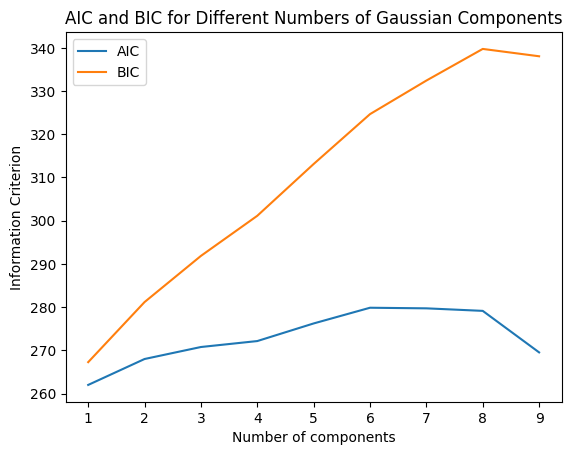

In [155]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Reshape filtered_data for the Gaussian Mixture model (it expects a 2D array)
filtered_data = filtered_data.reshape(-1, 1)

# Test various numbers of components
n_components = np.arange(1, 10)  # Adjust the range based on your expectation
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(filtered_data) for n in n_components]

# Calculate the AIC and BIC
aics = [m.aic(filtered_data) for m in models]
bics = [m.bic(filtered_data) for m in models]

# Plot the results
plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.legend(loc='best')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Different Numbers of Gaussian Components')
plt.show()


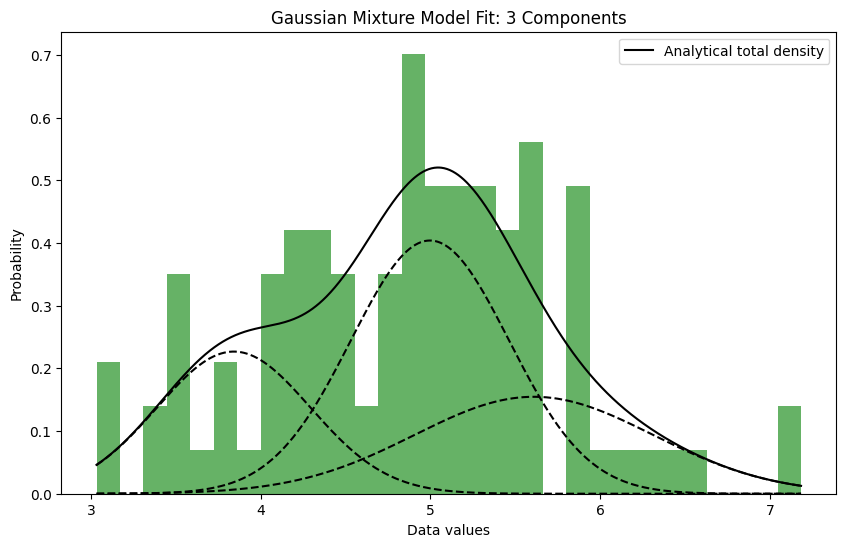

In [156]:

# Assuming filtered_data is already loaded and prepared
gmm = GaussianMixture(n_components=3, random_state=0).fit(filtered_data.reshape(-1, 1))

# Plot the histogram and the density estimation
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(filtered_data.min(), filtered_data.max(), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
responsibilities = gmm.predict_proba(x)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.plot(x, pdf, '-k', label='Analytical total density')
plt.plot(x, pdf_individual, '--k')
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.title('Gaussian Mixture Model Fit: 3 Components')
plt.legend()
plt.show()


In [159]:
filtered_data

array([4.17612008, 6.30694148, 7.06140808, 5.42662115, 5.09500374,
       4.99231105, 5.56783509, 3.47410342, 4.86459707, 5.50688909,
       3.1340796 , 5.19557826, 4.99629958, 6.19223933, 6.54350968,
       4.71374331, 5.23461867, 5.41316424, 5.29404414, 4.44620402,
       4.17905032, 4.94758936, 3.85447473, 5.6099145 , 4.71942302,
       3.62606013, 4.14312115, 3.73269164, 5.63069923, 5.43221443,
       4.96699407, 4.24329661, 4.01360104, 3.36367425, 5.23314336,
       5.24850018, 4.92710926, 5.49013769, 3.51071674, 4.38918003,
       5.01379847, 3.35359021, 3.03286925, 4.7144824 , 6.43125812,
       5.84326601, 4.51509464, 5.14653825, 4.05915703, 3.45913176,
       5.31668522, 4.69853701, 4.36753689, 4.44408373, 4.85982958,
       4.38496956, 5.92212557, 4.39249762, 5.57885071, 5.24526692,
       5.38310602, 4.83839207, 5.59126137, 3.58123633, 3.8718616 ,
       5.15359171, 5.35808366, 5.87026976, 5.39790694, 4.06959119,
       5.04245785, 5.60499161, 4.89622099, 5.87110098, 3.56302

In [163]:
log_dist.coords

Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-08-31

In [164]:
# Fit GMM and predict components
gmm = GaussianMixture(n_components=3, random_state=0)
components = gmm.fit_predict(log_dist.values.reshape(-1, 1))

# Attempting to add components as a coordinate
log_dist.coords['component'] = ('time', components)  # Make sure dimensions match


In [172]:
log_dist.component==0

<xarray.DataArray 'component' (time: 107)>
array([False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False])
Coordinates:
  * time       (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-08-31
    component  (time) int64 1 0 1 0 0 0 0 0 1 0 0 1 ... 0 1 0 1 1 0 1 2 0 0 1 1

In [173]:
# Select log_dist where component is 0
selected_data_where_component_0 = log_dist.where(log_dist.component == 0, drop=True)
print(selected_data_where_component_0)


<xarray.DataArray 'neg_ions' (time: 67)>
array([6.30694148, 7.06140808, 5.42662115, 5.09500374, 4.99231105,
       5.56783509, 4.86459707, 5.50688909, 5.19557826, 4.99629958,
       6.19223933, 6.54350968, 4.71374331, 5.23461867, 5.41316424,
       5.29404414, 4.94758936, 5.6099145 , 4.71942302, 5.63069923,
       5.43221443, 4.96699407, 5.23314336, 5.24850018, 4.92710926,
       5.49013769, 5.01379847, 4.7144824 , 6.43125812, 5.84326601,
       4.51509464, 5.14653825, 5.31668522, 4.69853701, 4.85982958,
       5.92212557, 5.57885071, 5.24526692, 5.38310602, 4.83839207,
       5.59126137, 5.15359171, 5.35808366, 5.87026976, 5.39790694,
       5.04245785, 5.60499161, 4.89622099, 5.87110098, 5.27395461,
       6.0496804 , 5.85988831, 5.8193229 , 4.68040354, 4.86600948,
       4.97316933, 5.17042543, 4.87149533, 5.55489965, 5.59226999,
       5.28636756, 5.92504589, 7.18269674, 4.92774418, 4.97661131,
       4.79106111, 4.64939433])
Coordinates:
  * time       (time) datetime64[ns] 2024-0

In [175]:
# Select log_dist where component is 1
selected_data_where_component_1 = log_dist.where(log_dist.component == 1, drop=True)
print(selected_data_where_component_1)


<xarray.DataArray 'neg_ions' (time: 38)>
array([4.17612008, 2.58314115, 3.47410342, 3.1340796 , 4.44620402,
       4.17905032, 3.85447473, 2.76852368, 3.62606013, 4.14312115,
       3.73269164, 4.24329661, 4.01360104, 3.36367425, 3.51071674,
       4.38918003, 3.35359021, 3.03286925, 4.05915703, 3.45913176,
       4.36753689, 4.44408373, 4.38496956, 4.39249762, 3.58123633,
       3.8718616 , 4.06959119, 3.56302653, 3.75389859, 4.15658665,
       4.38335588, 4.20520852, 3.16628477, 4.46771871, 4.42370294,
       4.10162046, 4.31861949, 4.07871632])
Coordinates:
  * time       (time) datetime64[ns] 2024-05-17 2024-05-19 ... 2024-08-31
    component  (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1


In [176]:
# Select log_dist where component is 2
selected_data_where_component_2 = log_dist.where(log_dist.component == 2, drop=True)
print(selected_data_where_component_2)


<xarray.DataArray 'neg_ions' (time: 2)>
array([10.02930029,  9.26885339])
Coordinates:
  * time       (time) datetime64[ns] 2024-08-07 2024-08-27
    component  (time) int64 2 2


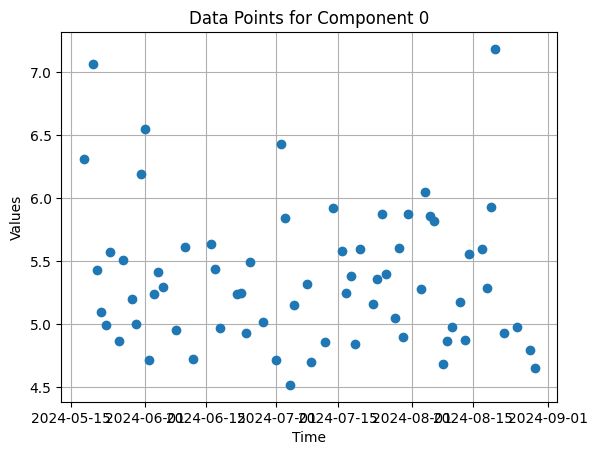

In [174]:
import matplotlib.pyplot as plt

# Plotting selected data
plt.plot(selected_data_where_component_0.time, selected_data_where_component_0, marker='o', linestyle='none')
plt.title('Data Points for Component 0')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()


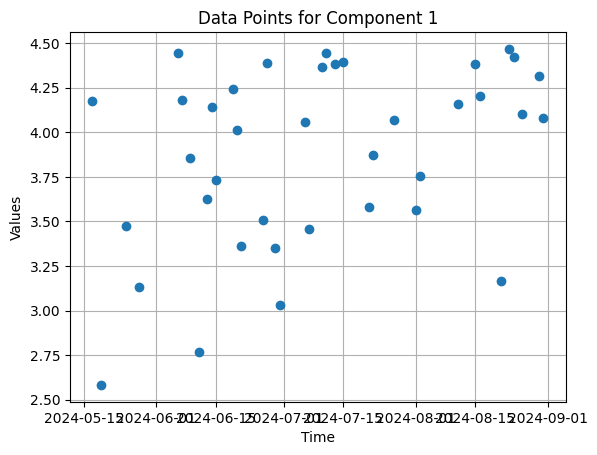

In [177]:
# Plotting selected data
plt.plot(selected_data_where_component_1.time, selected_data_where_component_1, marker='o', linestyle='none')
plt.title('Data Points for Component 1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()


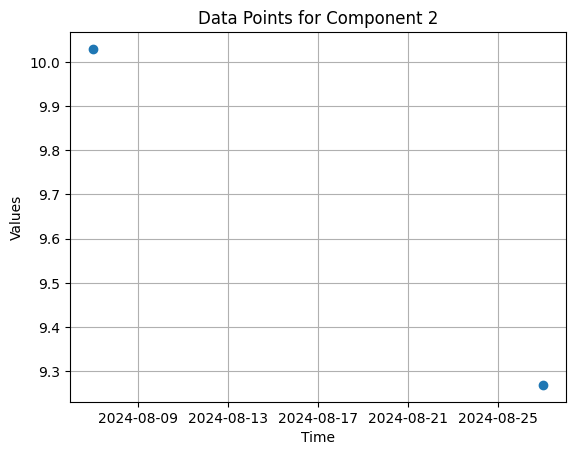

In [178]:
# Plotting selected data
plt.plot(selected_data_where_component_2.time, selected_data_where_component_2, marker='o', linestyle='none')
plt.title('Data Points for Component 2')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [162]:
# Reshape the log_dist for GMM
values = log_dist.values.reshape(-1, 1)

# Fit the GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(values)

# Predict the component for each log_dist point
log_dist['component'] = gmm.predict(values)

component_counts = log_dist['component'].value_counts()
print(component_counts)

# Example for component 0
component_0_days = log_dist[log_dist['component'] == 0]['date']
print("Days associated with component 0:")
print(component_0_days)



ValueError: cannot add coordinates with new dimensions to a DataArray

In [ ]:
# Plot histogram of components with the number of points
fig, ax = plt.subplots()
component_counts.plot(kind='bar', ax=ax)
ax.set_title('Number of Data Points per Gaussian Component')
ax.set_xlabel('Component')
ax.set_ylabel('Count')
plt.show()

# Print days associated with each component
for comp in np.unique(data['component']):
    print(f"Days associated with component {comp}:")
    print(data[data['component'] == comp]['date'])
    print("\n")


In [70]:
diurnal_daily_change

<xarray.DataArray 'neg_ions' (hour: 1, diameter: 10)>
array([[485.84478039, 415.22286043, 629.0534141 , 812.98402293,
        686.29735265, 425.65293012, 293.3081692 , 354.21557144,
        382.22846304, 381.24102721]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * hour      (hour) int64 0

In [ ]:
may.groupby(may.time.dt.hour).mean(dim='time')

In [42]:
monthly_data = rolling_median_sub.resample(time='M')  # Resample by month


In [38]:
monthly_data

DataArrayResample, grouped over '__resample_dim__'
5 groups with labels 2024-05-31, ..., 2024-09-30.

In [40]:
# Step 3: Now, calculate diurnal variations, e.g., the mean across each hour for each month
diurnal_variation = monthly_data.resample(monthly_data.time.dt.hour).mean(dim='time')

AttributeError: 'DataArrayResample' object has no attribute 'resample'

In [26]:
# Step 1: Resample the data into hourly intervals
hourly_data = rolling_median_sub.resample(time='1H').mean()

# Step 2: Group the hourly data by month
monthly_hourly_data = hourly_data.groupby('time.month')

# Step 3: Now, calculate diurnal variations, e.g., the mean across each hour for each month
diurnal_variation_by_month = monthly_hourly_data.mean(dim='time')

# Print the result to verify
print(diurnal_variation_by_month)


/home/coliewo/.local/lib/python3.10/site-packages/xarray/core/groupby.py:534: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


<xarray.DataArray 'neg_ions' (month: 5, diameter: 10)>
array([[ 37.15158786,  39.04214447,  47.76802232,  59.1324894 ,
         65.89225285,  67.5755551 ,  72.35995911,  82.54804724,
         94.0731583 , 110.10812303],
       [ 27.51728401,  29.03215078,  32.42239421,  38.41417768,
         45.12505832,  50.88400607,  56.47907118,  63.70454561,
         72.80313451,  88.31931493],
       [ 28.22812128,  30.42422792,  34.7183699 ,  41.55299216,
         49.08837033,  55.94660781,  64.18313582,  74.19713856,
         85.93150322, 102.31931973],
       [140.79359283, 120.52330158, 186.49125146, 244.00971696,
        206.10335055, 125.83756081,  88.67173742, 112.48519866,
        127.888456  , 135.95593282],
       [  7.30855303,   8.42576205,  11.68935742,  16.12124311,
         22.62982841,  28.08710014,  32.22284055,  36.02282334,
         39.03053153,  46.70943696]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * month     (month) int64 5

In [36]:
# Step 1: Resample the data into hourly intervals
hourly_data = rolling_median_sub.resample(time='1H').mean()

# Step 2: Group the hourly data by month
monthly_hourly_data = hourly_data.groupby('time.month')

# Step 3: Now, calculate diurnal variations, e.g., the mean across each hour for each month
diurnal_variation = monthly_hourly_data.resample(monthly_hourly_data.time.dt.hour).mean(dim='time')

diurnal_variation


/home/coliewo/.local/lib/python3.10/site-packages/xarray/core/groupby.py:534: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


AttributeError: 'DataArrayGroupBy' object has no attribute 'resample'

In [29]:
diurnal_variation_by_month

<xarray.DataArray 'neg_ions' (month: 5, diameter: 10)>
array([[ 37.15158786,  39.04214447,  47.76802232,  59.1324894 ,
         65.89225285,  67.5755551 ,  72.35995911,  82.54804724,
         94.0731583 , 110.10812303],
       [ 27.51728401,  29.03215078,  32.42239421,  38.41417768,
         45.12505832,  50.88400607,  56.47907118,  63.70454561,
         72.80313451,  88.31931493],
       [ 28.22812128,  30.42422792,  34.7183699 ,  41.55299216,
         49.08837033,  55.94660781,  64.18313582,  74.19713856,
         85.93150322, 102.31931973],
       [140.79359283, 120.52330158, 186.49125146, 244.00971696,
        206.10335055, 125.83756081,  88.67173742, 112.48519866,
        127.888456  , 135.95593282],
       [  7.30855303,   8.42576205,  11.68935742,  16.12124311,
         22.62982841,  28.08710014,  32.22284055,  36.02282334,
         39.03053153,  46.70943696]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * month     (month) int64 5 6 7 8 9
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [32]:
May_hourly_data = diurnal_variation_by_month['month'==5]

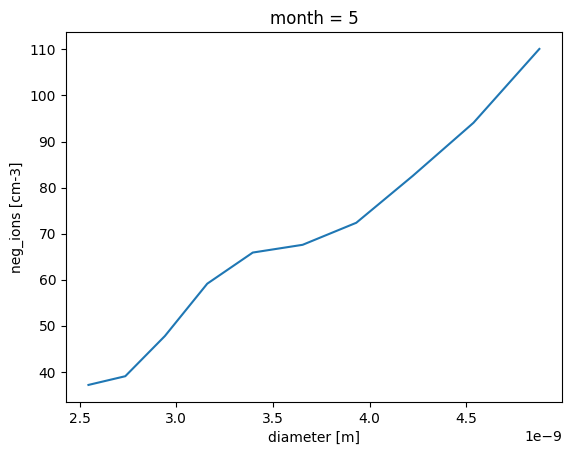

In [34]:
May_hourly_data.plot()

In [28]:
import matplotlib.pyplot as plt

# Select data for May (month=5)
May_hourly_data = monthly_hourly_data[1]

# Plot the diurnal variation for May
May_hourly_data.plot()
plt.title('Diurnal Variation for May')
plt.xlabel('Hour')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()


KeyError: 1

In [ ]:
#Step 3
#Identify diurnal background and active regions. we recommend dividing the dataset into seasons and examining the diurnal behaviour in each season separately
#Divide into months?

may = rolling_median.sel(time=slice('2024-05-19','2024-05-25'))     
june = rolling_median.sel(time=slice('2024-05-26','2024-06-01'))  
july = rolling_median.sel(time=slice('2024-06-02','2024-06-08')) 
aug = rolling_median.sel(time=slice('2024-06-09','2024-06-15'))   